# Анализ и визуализация результатов тематического моделирования полного новостного набора данных

In [4]:
import pymorphy2 

In [9]:
def string_dev (a_in):                              # Очистка текта от тегов и специальных символов
    x_in = re.sub(r'\n',' ',a_in)                    # удаление символов конца строки
    y_in = x_in.lower()                             # приведение ситоки к нижнему регистру
    b_in = re.sub(r'&\w+;',' ', y_in)                 # замена тегов типа'&nbsp;'  на пробел
    d_in = re.sub(r'<[^>]*>',' ', b_in)               # удаление тегов
    f_in = re.sub(r'www.\w+.\w{2,3}?',' ', d_in)      # удаление адресов веб-серверов
#\xad
#–\xa0
    a_in = re.sub(r'\xad','', f_in)
    c_in = re.sub(r'\\xa0-','', a_in)
    u_in = re.sub(r'\\u200e','', c_in)    
    w_in = re.sub(r'\d+','', u_in)                        # удаление последовательностей цифр
    y_in = re.sub(r'[\-]',' ',w_in)
    yy_in = re.sub(r'[_]+', ' ',y_in)
    yyy_in = re.sub(r'[ι,…,—,–,\.,//,\(,\),",\[,\],\\\\,\\,,\-,:,;,<,>,=,\?,©,!,@,№,#,%,\',\+,\*,“,”,&,∙,~,\$,\^,•,«,»,_,ι,і,‑,‘,’,і]+','',yy_in)
#    s_in = re.sub(r'\W', ' ', y_in)
    q_in = re.sub(r'[a-z]*','', yyy_in)                 # удаление латинских букв
    
    sss_in = re.sub(r'\b\w{,2}\b','', q_in)          # удаление всех слов длиной до 2-х букв
    qms_in = re.sub(r'\s{2,}',' ', sss_in)            # замена кратного числа пробелов на один
    nms_in = qms_in.strip()
#    nms_in = re.sub(r'^[^\w]*\s', '', qms_in)         # удаление пробелов в начале строки
#    mms_in = re.sub(r'\s*$','', nms_in)              # удаление пробелов в конце строки
    return (nms_in)


In [6]:
def lematization (f_input_list):          # Лематизация слов в списке
# Требуется  import pymorphy2    
    global abbr_list                      # Глобальный список аббривиатур
    morph = pymorphy2.MorphAnalyzer()
    lnorm = list()
    for word in f_input_list:
        if word not in abbr_list:
            p = morph.parse(word)[0]
            lnorm.append(p.normal_form)
        else:
            lnorm.append(word)
    return (lnorm)    

In [7]:
def del_my_stop_words(word_tokens): # удаление из списка моих стоп-слов
    
    stop_words_nltk = {'который', 'кому', 'имя', 'сегодня', 'вчера', 'завтра', 'также', 'в', 'во', 'свой', 
                  'это', 'часто', 'зачастую', 'мочь', 'смочь','а', 'без', 'более', 'больше', 'будет', 'будто', 
                  'бы', 'был', 'была', 'были', 'было', 'быть', 'в', 'вам', 'вас', 'вдруг', 'ведь', 'во', 'вот', 
                  'впрочем', 'все', 'всегда', 'всего', 'всех', 'всю', 'вы', 'где', 'да', 'даже', 'два', 'для', 
                  'до', 'другой', 'его', 'ее', 'ей', 'ему', 'если', 'есть', 'еще', 'ж', 'же', 'за', 'зачем', 'здесь', 
                  'и', 'из', 'или', 'им', 'иногда', 'их', 'к', 'как', 'какая', 'какой', 'когда', 'конечно', 'кто', 
                  'куда', 'ли', 'лучше', 'между', 'меня', 'мне', 'много', 'может', 'можно', 'мой', 'моя', 'мы', 'на',
                  'над', 'надо', 'наконец', 'нас', 'не', 'него', 'нее', 'ней', 'нельзя', 'нет', 'ни', 'нибудь', 
                  'никогда', 'ним', 'них', 'ничего', 'но', 'ну', 'о', 'об', 'один', 'он', 'она', 'они', 'опять', 
                  'от', 'перед', 'по', 'под', 'после', 'потом', 'потому', 'почти', 'при', 'про', 'раз', 'разве', 
                  'с', 'со', 'сам', 'свою', 'себе', 'себя', 'сейчас', 'c', 'со', 'совсем', 'так', 'такой', 'там', 'тебя', 
                  'тем', 'теперь', 'то', 'тогда', 'того', 'тоже', 'только', 'том', 'тот', 'три', 'тут', 'ты', 
                  'у', 'уж', 'уже', 'хорошо', 'хоть', 'что', 'чего', 'чем', 'через', 'что', 'чтоб', 'чтобы', 'чуть', 
                  'эти', 'этого', 'этой', 'этом', 'этот', 'эту', 'я', 'сказал', 'человек', 'жизнь', 'говорил', 'кажется', 
                  'сказать', 'сегодня', 'сказала', 'сказал'} 
    
    my_stop_words = {'сгт','свой', 'стать', 'кроме', 'разный', 'около', 'затем', 'помимо', 'ваш', 'вам', 'некоторый', 
                     'лишь', 'каждый', 'самый', 'также', 'неоднократно', 'ещё', 'сразу', 'среди',
                  'однако', 'вновь', 'иной', 'ныне', 'пока', 'хотя','либо','немного', 'гораздо', 'ничто', 'нередко', 'ныне', 
                  'наоборот', 'впереди', 'таковой', 'мимо', 'тесно', 'вряд', 'нечто', 'почём', 'почему', 'любой', 'обратно',
                  'оттуда', 'очень', 'понапрасну', 'поскольку', 'почему', 'поэтому', 'прежде', 'причём', 'прочий', 'пусть', 
                  'пока', 'это', 'наш', 'несколько', 'около', 'помимо', 'однако', 'сколько', 'либо', 'гораздо', 'ничто',
                   'наоборот', 'никак', 'таковой', 'твой', 'нечто', 'понапрасну', 'почём', 'подробный', 'информация'}
    filtered_first_names = {'александр', 'игорь', 'алексей', 'сергей', 'ольга', 'елена', 'дмитрий', 'светлана', 'валерий',
                           'юрий', 'олег', 'анна', 'василий', 'евгений', 'михаил', 'павел', 'виктор', 'ирина', 'роман', 'юлий',
                           'иван', 'мария', 'максим', 'станислав', 'алена', 'алёна', 'борис', 'антон', 'вадим', 'пётр', 
                           'денис', 'валентин', 'леонид', 'лариса', 'наталья', 'никита', 'оксана', 'артур', 'георгий', 'данила', 'варвара',
                           'геннадий', 'кристина', 'яков', 'юлия', 'евдоким', 'кузьма', 'фёдор', 'лилия', 'егор', 'федот',
                           'глеб', 'захар', 'инна', 'римма', 'филипп', 'айдар', 'валентина', 'даниил', 'евгения', 'евсей',
                           'маша', 'алиса', 'валерьян', 'емеля', 'софья','галина'}
                            
    stop_words = stop_words_nltk | my_stop_words | filtered_first_names
    filtered_sentence = [w for w in word_tokens if not w in stop_words]

    return (filtered_sentence)

In [10]:
def process_str_of_the_news(string):      # Обработка сырой строки-новости 
    global abbr_list
    string_2 = string_dev(string)         # Обработка строки новости
    qqq =''
    if len(string_2) != 0:                      # Если это непустая строка после обработки...
        list_of_keys = re.split (' ', string_2) # создание списка ключевых слов новости
        
        m_norm = del_my_stop_words (list_of_keys)        # удаление стоп-слов из списка            
        l_norm = lematization (m_norm)                   # лематизация слов из списка новости
        m_norm = del_my_stop_words (l_norm)              # повторное удаление стоп-слов из списка после лематизации            
#        l_1 = stemming_for_words_of_list (l_norm)        # стемминг слов списка

        st = ' '.join (m_norm)                        # преобразование списка в строку с разделением слов пробелами
        sss = re.sub(r'\b\w{1,2}\b','',st)         # удаление всех слов из двух и менее букв
        qqq = re.sub('\s{2,}',' ',sss)             # замена кратного числа пробелов на один
    return (qqq)

# Построение таблицы для файла новостей

In [11]:
import pandas as pd

In [12]:
import numpy as np

In [13]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [19]:
#import nltk

In [20]:
#from nltk.util import ngrams

In [14]:
import re

In [15]:
import collections
from collections import Counter

In [16]:
from supervenn import supervenn

In [24]:
import gensim

C:\Users\spaps\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [25]:
#nltk.download('punkt')

In [17]:
df_excel = pd.read_excel('News_22369_Processed_1.xlsx')
df_excel.head()

Unnamed: 0  News_Id                                         News_Title  \
0           0        1  В СЭИ обсудили экономико-правовое развитие сов...   
1           1        2  Прошла встреча представителей опорного вуза с ...   
2           2        3  Технический университет стал участником семина...   
3           3        4  Объявляется набор на подготовку по программе «...   
4           4        5  В ИнПИТ разработали лучший проект Школы цифров...   

   NumWords  NumUnicTokens                                          NewsWords  
0       136            106  сэи обсудить экономико правовой развитие совре...  
1       113             83  пройти встреча представитель опорный вуз выпус...  
2       228            158  технический университет участник семинар роско...  
3        78             52  объявляться набор подготовка программа строите...  
4       173            129  инпит разработать хороший проект школа цифрово...

In [18]:
# Вычисление частот всех слов в выборке новостей
common_idf = Counter()
for i, row in df_excel.iterrows():
    text = row['NewsWords']
    text1 = text.split(' ')
    common_idf = common_idf + Counter(text1)

In [19]:
print('common_idf= ', len(common_idf))
vocab = common_idf.keys()
print ('vocab = ', len(vocab))

common_idf=  50105
vocab =  50105


In [20]:
df_excel[['NumWords', 'NumUnicTokens']].describe()

NumWords  NumUnicTokens
count  22369.000000   22369.000000
mean     118.955340      82.670750
std      107.254813      59.451551
min        5.000000       5.000000
25%       60.000000      46.000000
50%       95.000000      69.000000
75%      144.000000     102.000000
max     2706.000000    1115.000000

# Обработка матрицы Theta тематического моделирования: вероятности принаждежности новостей 6-ти темам

In [21]:
db_theta = pd.read_csv('Theta_Topics_6_prime.csv', delimiter=',').transpose()
db_theta.head()

0         1         2         3         4         5
Unnamed: 0    topic0    topic1    topic2    topic3    topic4    topic5
14400       0.103558  0.781144  0.025861  0.067529  0.013202  0.008707
14401       0.061217  0.854072  0.076188  0.001499  0.000127  0.006897
14402       0.609389  0.025642  0.000348  0.319735  0.000133  0.044754
14403       0.001308  0.000011  0.155998  0.017627  0.091788  0.733269

In [22]:
db_theta.columns

RangeIndex(start=0, stop=6, step=1)

In [23]:
db_theta.index

Index(['Unnamed: 0', '14400', '14401', '14402', '14403', '14404', '14405',
       '14406', '14407', '14408',
       ...
       '12390', '12391', '12392', '12393', '12394', '12395', '12396', '12397',
       '12398', '12399'],
      dtype='object', length=22370)

In [24]:
db_theta.rename(columns = {0:'topic0', 1:'topic1', 2:'topic2', 3:'topic3', 4:'topic4', 5:'topic5'}, inplace=True)

In [25]:
db_theta.head()

topic0    topic1    topic2    topic3    topic4    topic5
Unnamed: 0    topic0    topic1    topic2    topic3    topic4    topic5
14400       0.103558  0.781144  0.025861  0.067529  0.013202  0.008707
14401       0.061217  0.854072  0.076188  0.001499  0.000127  0.006897
14402       0.609389  0.025642  0.000348  0.319735  0.000133  0.044754
14403       0.001308  0.000011  0.155998  0.017627  0.091788  0.733269

In [26]:
db_theta = db_theta.drop(index = ['Unnamed: 0'])

In [27]:
db_theta.reset_index(drop=True, inplace=True)

In [28]:
db_theta.shape

(22369, 6)

Вычисление параметра gr для дефазификации принадлежности новостей темам

In [29]:
# Метод max-min
gr = min(db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].max(axis=1))
gr

0.21643978

In [39]:
# Метод min-man
lr = max(db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].min(axis=0))
lr

7.624041e-15

In [40]:
# Среднее
bound = (gr+lr)/2
bound


0.10821989000000382

In [30]:
bound = gr
a = np.array(list(range(1,7))*22369).reshape(22369,6)
db_theta[['t0', 't1', 't2', 't3', 't4', 't5']] = (db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]>bound)*a
db_theta.head()

topic0    topic1    topic2    topic3    topic4    topic5  t0  t1  t2  t3  \
0  0.103558  0.781144  0.025861  0.067529  0.013202  0.008707   0   2   0   0   
1  0.061217  0.854072  0.076188  0.001499  0.000127  0.006897   0   2   0   0   
2  0.609389  0.025642  0.000348  0.319735  0.000133  0.044754   1   0   0   4   
3  0.001308  0.000011  0.155998  0.017627  0.091788  0.733269   0   0   0   0   
4  0.036122  0.000109  0.000088  0.570322  0.119202  0.274158   0   0   0   4   

   t4  t5  
0   0   0  
1   0   0  
2   0   0  
3   0   6  
4   0   6

In [31]:
db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]

topic0    topic1    topic2    topic3    topic4    topic5
0      0.103558  0.781144  0.025861  0.067529  0.013202  0.008707
1      0.061217  0.854072  0.076188  0.001499  0.000127  0.006897
2      0.609389  0.025642  0.000348  0.319735  0.000133  0.044754
3      0.001308  0.000011  0.155998  0.017627  0.091788  0.733269
4      0.036122  0.000109  0.000088  0.570322  0.119202  0.274158
...         ...       ...       ...       ...       ...       ...
22364  0.002038  0.000017  0.003274  0.063254  0.234763  0.696655
22365  0.005609  0.007674  0.597408  0.333178  0.056015  0.000115
22366  0.076924  0.250516   0.00046  0.670159  0.000205  0.001736
22367  0.015102  0.017845  0.429561  0.426679  0.028399  0.082415
22368  0.493993  0.125839  0.177853  0.043323  0.006567  0.152423

[22369 rows x 6 columns]

In [32]:
most_valued_topics = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].astype(float).idxmax(axis="columns", skipna=True)


In [33]:
db_theta['Most valueble topic'] = most_valued_topics
db_theta.head()

topic0    topic1    topic2    topic3    topic4    topic5  t0  t1  t2  t3  \
0  0.103558  0.781144  0.025861  0.067529  0.013202  0.008707   0   2   0   0   
1  0.061217  0.854072  0.076188  0.001499  0.000127  0.006897   0   2   0   0   
2  0.609389  0.025642  0.000348  0.319735  0.000133  0.044754   1   0   0   4   
3  0.001308  0.000011  0.155998  0.017627  0.091788  0.733269   0   0   0   0   
4  0.036122  0.000109  0.000088  0.570322  0.119202  0.274158   0   0   0   4   

   t4  t5 Most valueble topic  
0   0   0              topic1  
1   0   0              topic1  
2   0   0              topic0  
3   0   6              topic5  
4   0   6              topic3

In [34]:
them_model_0_5 = (db_theta[['t0', 't1', 't2', 't3', 't4', 't5']]!=0)*1
them_model_0_5.columns =  ['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']
them_model_0_5  # таблица индикаторов отнесения новостей к темам

topic_0  topic_1  topic_2  topic_3  topic_4  topic_5
0            0        1        0        0        0        0
1            0        1        0        0        0        0
2            1        0        0        1        0        0
3            0        0        0        0        0        1
4            0        0        0        1        0        1
...        ...      ...      ...      ...      ...      ...
22364        0        0        0        0        1        1
22365        0        0        1        1        0        0
22366        0        1        0        1        0        0
22367        0        0        1        1        0        0
22368        1        0        0        0        0        0

[22369 rows x 6 columns]

In [65]:
# Посчет новостей в нечетких темах
fuzzy= (them_model_0_5 !=0).sum(axis = 0)
ft = list(fuzzy)

In [66]:
fuzzy_thems = pd.DataFrame(fuzzy)
fuzzy_thems.columns = ['Number of news']

In [68]:
fuzzy_thems

Number of news
topic_0            6929
topic_1            3976
topic_2            5454
topic_3            6525
topic_4            5769
topic_5            6774

In [ ]:
# Дефазификация на основе ручной обработки gr=0.24 
#bound = 0.24
#fuzzy_thems = hf[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']].sum(axis = 0)
#ft = list(fuzzy_thems)

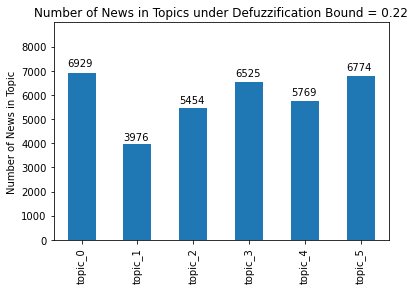

In [85]:

d = fuzzy_thems.plot.bar(title = 'Number of News in Topics under Defuzzification Bound = '+ str(round(bound,2)), 
                         yticks =range(0,9000,1000), ylim = ([0,9000]),grid =False, legend=False)
#d.bar_label(d, label_type='edge')
# marks = [(x,str(x)) for x in m]
d.set_ylabel('Number of News in Topic')
for date, label in enumerate(list(fuzzy_thems.index)):
    d.annotate(ft[date], xy=(date, date + 20),
                xytext=(-14,ft[date]/40),
                textcoords='offset points')
plt.savefig('Number of most valued news by topics  gr_22', dpi = 800, bbox_inches='tight') 

In [86]:
fuzzy_thems.sum()

Number of news    35427
dtype: int64

In [87]:
them_sum = pd.DataFrame(ft, index=['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5'],
                       columns =['Number of docs'])
them_sum

Number of docs
topic_0            6929
topic_1            3976
topic_2            5454
topic_3            6525
topic_4            5769
topic_5            6774

In [88]:
set_of_thems = them_sum.shape[0]
set_of_thems  # число тем

6

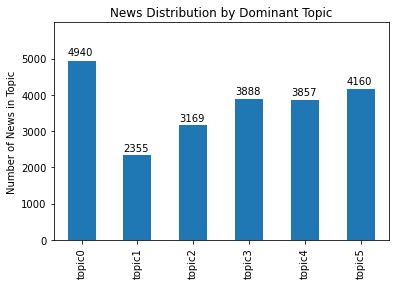

In [91]:
# Topic Distribution by Dominant Topics
grouped = db_theta.groupby('Most valueble topic')
them_num = grouped['Most valueble topic'].agg(np.size)
#plt.figure(figsize=(6, 4))
d = them_num.plot.bar(title = 'News Distribution by Dominant Topic', yticks =range(0,6000,1000), ylim = ([0,6000]),
                      grid =False, legend=False)
d.set_xlabel(None)
d.set_ylabel('Number of News in Topic')
m = list(np.array(them_num))
for date, label in enumerate(list(them_num.index)):
    d.annotate(m[date], xy=(date, date + 40),
                xytext=(-14,m[date]/27),
                textcoords='offset points')
# bbox_extra_artists=(lgd,), bbox_inches='tight'

plt.savefig('News Distribution by Dominant Topic', dpi = 800, bbox_inches='tight')     

In [92]:
# List of Topic Weights Способ 1 Учитываются все веса для новостей
# Суммируем только веса для новостей, принадлежащих теме
dat_1 = pd.DataFrame(db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].values * them_model_0_5.values,
                    columns=them_model_0_5.columns, index=them_model_0_5.index)
doc_topic_probabilities = dat_1.sum()


In [93]:
print (doc_topic_probabilities)

topic_0    3929.606864
topic_1    1973.963226
topic_2    2881.240028
topic_3    3141.103046
topic_4    3304.078612
topic_5    3282.452862
dtype: object


In [94]:
print(them_num)

Most valueble topic
topic0    4940
topic1    2355
topic2    3169
topic3    3888
topic4    3857
topic5    4160
Name: Most valueble topic, dtype: int64


In [95]:
# нечеткое распределение новостей по темам
ft

[6929, 3976, 5454, 6525, 5769, 6774]

In [96]:
# Вычисление относительных средних весов тем (по весам и количеству новостей в этих темах)
#doc_topic_waights1 = doc_topic_probabilities/(them_num/100)
doc_topic_waights1 = doc_topic_probabilities/(np.array(ft)/100)
print(doc_topic_waights1)

topic_0    56.712467
topic_1    49.646962
topic_2    52.828017
topic_3     48.13951
topic_4    57.272987
topic_5    48.456641
dtype: object


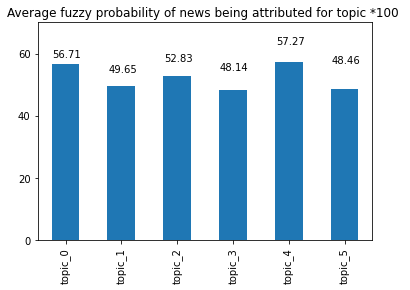

In [97]:
d = doc_topic_waights1.plot.bar(title = 'Average fuzzy probability of news being attributed for topic *100 ', 
                                yticks =range(0,70,20), ylim = ([0,70]),
                                grid =False, legend=False)
m1 = [round(x,2) for x in list(np.array(doc_topic_waights1))]
for date, label in enumerate(list(doc_topic_waights1.index)):
    d.annotate(m1[date], xy=(date, date + 13),
                xytext=(-13, m1[date]/0.4),
                textcoords='offset points')



In [98]:
# List of Topic Weights Способ 2 Учитываются только максимальные веса для новостей и 
temp_tab = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].max(axis = 1)
temp_tab1 = list(np.array(temp_tab))*6
temp_tab2 = np.array(temp_tab1).reshape(6, 22369).transpose()
temp_tab3 = temp_tab2 == db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]
temp_tab4 = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']] * temp_tab3
doc_topic_waights = temp_tab4.sum()/(them_num/100).round(2)

In [99]:
# Просуммированы только максимальные вероятности в строках матрицы 
# db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]
doc_topic_waights

topic0    67.272466
topic1    62.804608
topic2    68.806431
topic3    59.666831
topic4     70.73552
topic5    59.856157
dtype: object

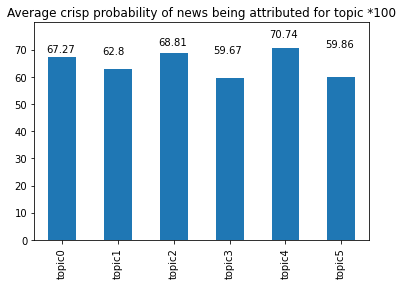

In [100]:
# Topic Distribution by Topic Weights Plot
d = doc_topic_waights.plot.bar(title = 'Average crisp probability of news being attributed for topic *100', 
                               yticks =range(0,80,10), ylim = ([0,80]),
                               grid =False, legend=False)
m = [round(x,2) for x in list(np.array(doc_topic_waights))]
for date, label in enumerate(list(doc_topic_waights.index)):
    d.annotate(m[date], xy=(date, date + 40),
                xytext=(-16,m[date]/0.85),
                textcoords='offset points')

In [101]:
doc_topic_waights

topic0    67.272466
topic1    62.804608
topic2    68.806431
topic3    59.666831
topic4     70.73552
topic5    59.856157
dtype: object

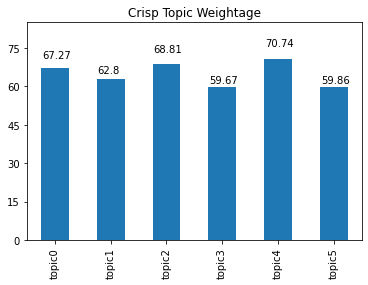

In [102]:
# Crisp Topic Weightage

d = doc_topic_waights.plot.bar(title = 'Crisp Topic Weightage', yticks =range(0,85,15), ylim = ([0,85]),
                      grid =False, legend=False)
m = [round(x,2) for x in list(np.array(doc_topic_waights))]
for date, label in enumerate(list(doc_topic_waights.index)):
    d.annotate(m[date], xy=(date, m[date]-18),
                xytext=(-13,m[date]/1.2),
                textcoords='offset points')
plt.savefig('Crisp_Topic_Weightage_22369', dpi = 600, bbox_inches='tight')       

In [103]:
df_dominant_topic_in_each_doc = them_num.to_frame(name='count').reset_index()
df_dominant_topic_in_each_doc
# them_num - распределение новостей по доминантным темам

Most valueble topic  count
0              topic0   4940
1              topic1   2355
2              topic2   3169
3              topic3   3888
4              topic4   3857
5              topic5   4160

In [104]:
df_topic_weightage_by_doc = doc_topic_waights.to_frame(name='count').reset_index()
df_topic_weightage_by_doc[['count']] = df_topic_weightage_by_doc[['count']]*100
df_topic_weightage_by_doc
# df_topic_weightage_by_doc средняя вероятность новостей по доминантным темам *100

index        count
0  topic0  6727.246592
1  topic1  6280.460827
2  topic2  6880.643069
3  topic3   5966.68315
4  topic4  7073.552006
5  topic5  5985.615704

In [105]:
db_theta.groupby('Most valueble topic')
them_num = grouped['Most valueble topic'].agg(np.size)
them_num

Most valueble topic
topic0    4940
topic1    2355
topic2    3169
topic3    3888
topic4    3857
topic5    4160
Name: Most valueble topic, dtype: int64

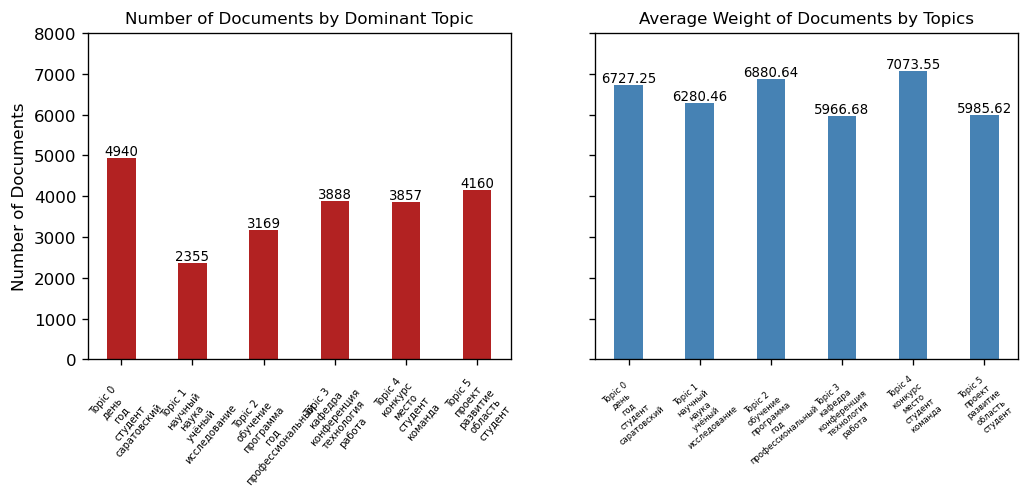

In [138]:

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
p1 = ax1.bar(x='Most valueble topic', height='count', data=df_dominant_topic_in_each_doc, width=.4, color='firebrick')
ax1.set_xticks(df_dominant_topic_in_each_doc['Most valueble topic'])
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(int(x))+ '\n' + '\n'.join(list(main_topics[int(x)])[0:4]))
#ax1.set_yticklabels(fontsize=6)
ax1.tick_params(axis='x', labelrotation=50)
ax1.bar_label(p1, label_type='edge', fontsize=8)
ax1.xaxis.set_major_formatter(tick_formatter)
plt.setp(ax1.get_xticklabels(), fontsize=6)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 8000)

# Average Topics Weights
p2 = ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.4, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
plt.setp(ax2.get_xticklabels(), fontsize=5)
ax2.bar_label(p2, label_type='edge', fontsize=8)
ax2.set_title('Average Weight of Documents by Topics', fontdict=dict(size=10))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.tick_params(axis='x', labelrotation=40)
fig.subplots_adjust(bottom=0.2)
plt.savefig('Num of Docs', dpi = 800) 

Формирование инвертированных индексов для тем (списки номеров новостей по каждой нечеткой i-ой теме inverted_index_them_mod[i])

In [139]:
dic_model = list()
for i in range(6):
    dic_model.append(dict(them_model_0_5['topic_'+str(i)]))
dic_model[0]

{0: 0,
 1: 0,
 2: 1,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 1,
 11: 1,
 12: 1,
 13: 1,
 14: 1,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 1,
 20: 1,
 21: 1,
 22: 0,
 23: 0,
 24: 0,
 25: 1,
 26: 1,
 27: 0,
 28: 0,
 29: 1,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 1,
 35: 0,
 36: 1,
 37: 1,
 38: 0,
 39: 0,
 40: 1,
 41: 1,
 42: 1,
 43: 0,
 44: 1,
 45: 0,
 46: 0,
 47: 0,
 48: 0,
 49: 1,
 50: 1,
 51: 1,
 52: 0,
 53: 1,
 54: 1,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 1,
 60: 1,
 61: 0,
 62: 0,
 63: 0,
 64: 0,
 65: 1,
 66: 0,
 67: 0,
 68: 1,
 69: 1,
 70: 1,
 71: 0,
 72: 0,
 73: 0,
 74: 0,
 75: 0,
 76: 0,
 77: 0,
 78: 0,
 79: 0,
 80: 0,
 81: 0,
 82: 1,
 83: 1,
 84: 0,
 85: 1,
 86: 0,
 87: 1,
 88: 0,
 89: 1,
 90: 0,
 91: 0,
 92: 0,
 93: 0,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 1,
 100: 1,
 101: 0,
 102: 0,
 103: 1,
 104: 1,
 105: 1,
 106: 1,
 107: 0,
 108: 0,
 109: 0,
 110: 0,
 111: 1,
 112: 0,
 113: 0,
 114: 0,
 115: 0,
 116: 1,
 117: 0,
 118: 0,
 119: 0,
 120: 1,
 121: 0,
 122: 0,
 12

In [140]:
inverted_index_them_mod = {}     # Формирование множества списков номеров новостей, отнесенных к каждой теме
for i in range(set_of_thems):
    inverted_index_them_mod[i]=[key for (key,num) in dic_model[i].items() if num == 1]
    print (len(inverted_index_them_mod[i]))
print (inverted_index_them_mod[1])

6929
3976
5454
6525
5769
6774
[0, 1, 12, 15, 16, 24, 30, 33, 34, 38, 43, 46, 49, 57, 72, 77, 82, 88, 90, 96, 97, 98, 103, 107, 113, 115, 123, 131, 132, 133, 134, 139, 142, 145, 149, 151, 160, 164, 168, 172, 175, 178, 179, 180, 184, 189, 190, 195, 198, 205, 208, 223, 230, 232, 238, 244, 245, 249, 253, 266, 278, 279, 295, 302, 303, 310, 321, 324, 330, 332, 338, 339, 340, 341, 342, 343, 345, 350, 358, 363, 382, 396, 400, 410, 420, 422, 424, 427, 432, 433, 437, 438, 443, 444, 452, 453, 469, 475, 476, 480, 481, 494, 498, 521, 525, 537, 542, 547, 551, 554, 564, 569, 580, 585, 591, 594, 631, 651, 669, 672, 685, 687, 697, 700, 701, 702, 703, 708, 711, 715, 717, 718, 727, 747, 752, 757, 760, 770, 780, 794, 795, 796, 806, 811, 813, 816, 825, 834, 836, 838, 841, 849, 854, 860, 865, 874, 884, 885, 887, 888, 889, 893, 902, 903, 922, 924, 984, 989, 991, 996, 1006, 1009, 1011, 1014, 1016, 1018, 1021, 1023, 1024, 1027, 1032, 1033, 1043, 1047, 1048, 1053, 1054, 1058, 1062, 1069, 1074, 1090, 1091, 1095,

Проценты пересечения тем по числу совпадающих новостей

In [141]:
tab_of_intersection = np.empty([6,6])
for i in range(set_of_thems):
    for j in range(set_of_thems):
        tab_of_intersection[i, j] = round((len(set(inverted_index_them_mod[i]).intersection(set(inverted_index_them_mod[j]))))/ \
                                    len(set(inverted_index_them_mod[i]))*100,2)

In [142]:
print ('Доля пересечения тем при границе дефазификации ', bound)
print(tab_of_intersection)

Доля пересечения тем при границе дефазификации  0.21643978
[[100.    10.15  11.37  12.8   19.4   18.85]
 [ 17.68 100.    17.18  29.07   5.01  16.93]
 [ 14.45  12.52 100.    22.13  10.78  23.51]
 [ 13.59  17.72  18.5  100.    16.84  23.23]
 [ 23.3    3.45  10.19  19.05 100.    18.1 ]
 [ 19.28   9.94  18.93  22.38  15.41 100.  ]]


In [148]:
# построение инвертированного индекса для тем вторым способом
them_nums_dict = {}                         # списки номеров новостей для тем 
num_them_dict = {}                          # списки тем для новостей
for i in range(6):
    them_nums_dict[i]=[]
for i in list(db_theta.index):
    b= db_theta.loc[i, ['t0', 't1', 't2', 't3', 't4', 't5']]
    c = list(b[b!=0].astype('int'))
    num_them_dict [i] = c
    for j in c:
        them_nums_dict[j-1].append(i)
    

Диаграмма Венна для нечеткого распределения новостей по темам

In [149]:
topics = ['Events & Memory Days', 'Science', 'Educational Opportunities and Services', 'Educational and Scientific Activities', 
'Student Life and Competitions ', 'Youth Science and Innovations']
sets_of_topics = list()
for i in range(6):
    sets_of_topics.append(set(inverted_index_them_mod[i]))


C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:376: UserWarning: Parameters figsize and dpi of supervenn() are deprecated and will be removed in a future version.
Instead of this:
    supervenn(sets, figsize=(8, 5), dpi=90)
Please either do this:
    plt.figure(figsize=(8, 5), dpi=90)
    supervenn(sets)
or plot into an existing axis by passing it as the ax argument:
    supervenn(sets, ax=my_axis)

  warnings.warn(
C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:171: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(0.5 * sum(col_widths), annot_y), s=str(annotation),
C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:186: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old 

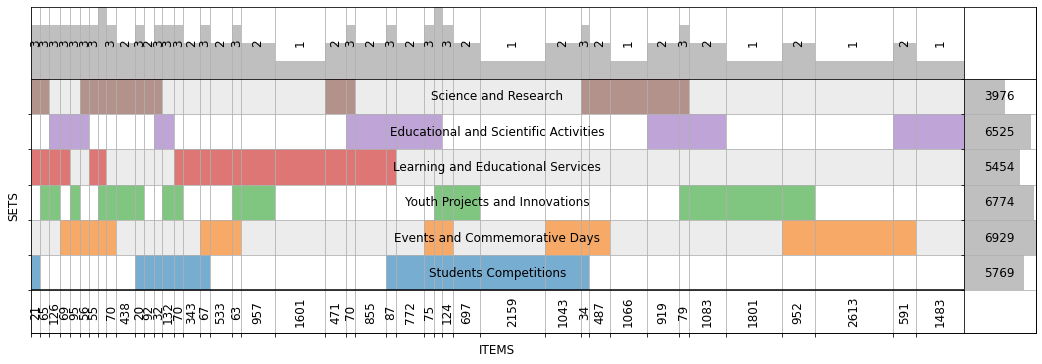

In [150]:
from supervenn import supervenn
sets = sets_of_topics
labels = ['Events and Commemorative Days', 'Science and Research', 'Learning and Educational Services', 'Educational and Scientific Activities', 
          'Students Competitions', 'Youth Projects and Innovations']
supervenn(sets, labels, figsize=(18, 6), sets_ordering='minimize gaps', 
          col_annotations_ys_count=1, min_width_for_annotation = 10,
          widths_minmax_ratio = 0.1, rotate_col_annotations=True, col_annotations_area_height=1.2)
plt.savefig('Venn diagramm.png', dpi = 800, bbox_inches='tight')

Распределение нововстей по приоритетным темам

In [151]:
lst_model = list() # список множеств приоритетных новостей в темах
for i in range(6):
    lst_model.append(set(db_theta.index[db_theta['Most valueble topic'] == 'topic'+str(i)].tolist()))


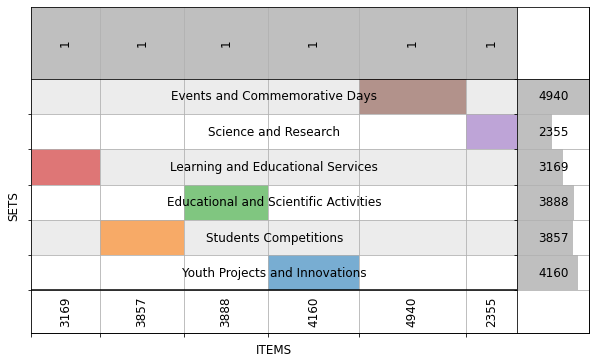

In [152]:
sets = lst_model
labels = ['Events and Commemorative Days', 'Science and Research', 'Learning and Educational Services', 'Educational and Scientific Activities', 
          'Students Competitions', 'Youth Projects and Innovations']
supervenn(sets, labels, figsize=(10, 6), sets_ordering='minimize gaps', 
          col_annotations_ys_count=1, min_width_for_annotation = 10,
          widths_minmax_ratio = 0.1, rotate_col_annotations=True, col_annotations_area_height=1.2)
plt.savefig('Diagramm_num_docs_by_dominant_topics.png', dpi = 800, bbox_inches='tight')

Гистограммы вероятностей новостей в темах

In [153]:
ttp = list()
ttp.append(list(dict(db_theta['topic0']*100).values()))
ttp.append(list(dict(db_theta['topic1']*100).values()))
ttp.append(list(dict(db_theta['topic2']*100).values()))
ttp.append(list(dict(db_theta['topic3']*100).values()))
ttp.append(list(dict(db_theta['topic4']*100).values()))
ttp.append(list(dict(db_theta['topic5']*100).values()))

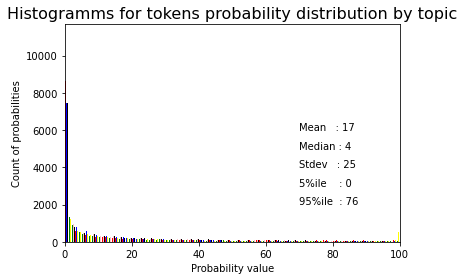

In [154]:
# Гстограмма вероятностей документов в теме
plt.hist(ttp, 100,  color = ["red", "green", "blue", "pink", "yellow", "black"])

#plt.hist(ttp[0], 50,  color = ["red"])


#plt.figure(figsize=(10,7), dpi=160)
#plt.hist(ttp, bins = 100, color='navy')
plt.text(70, 6000, "Mean   : " + str(round(np.mean(ttp))))
plt.text(70, 5000, "Median : " + str(round(np.median(ttp))))
plt.text(70, 4000, "Stdev   : " + str(round(np.std(ttp))))
plt.text(70, 3000, "5%ile    : " + str(round(np.quantile(ttp, q=0.05))))
plt.text(70, 2000, "95%ile  : " + str(round(np.quantile(ttp, q=0.95))))
plt.gca().set(xlim=(0, 100), ylabel='Count of probabilities', xlabel='Probability value')
#plt.tick_params(size=16)
#plt.xticks(np.linspace(0,300,10))
plt.title('Histogramms for token''s probability distribution by topic' , fontdict=dict(size=16))
plt.show()

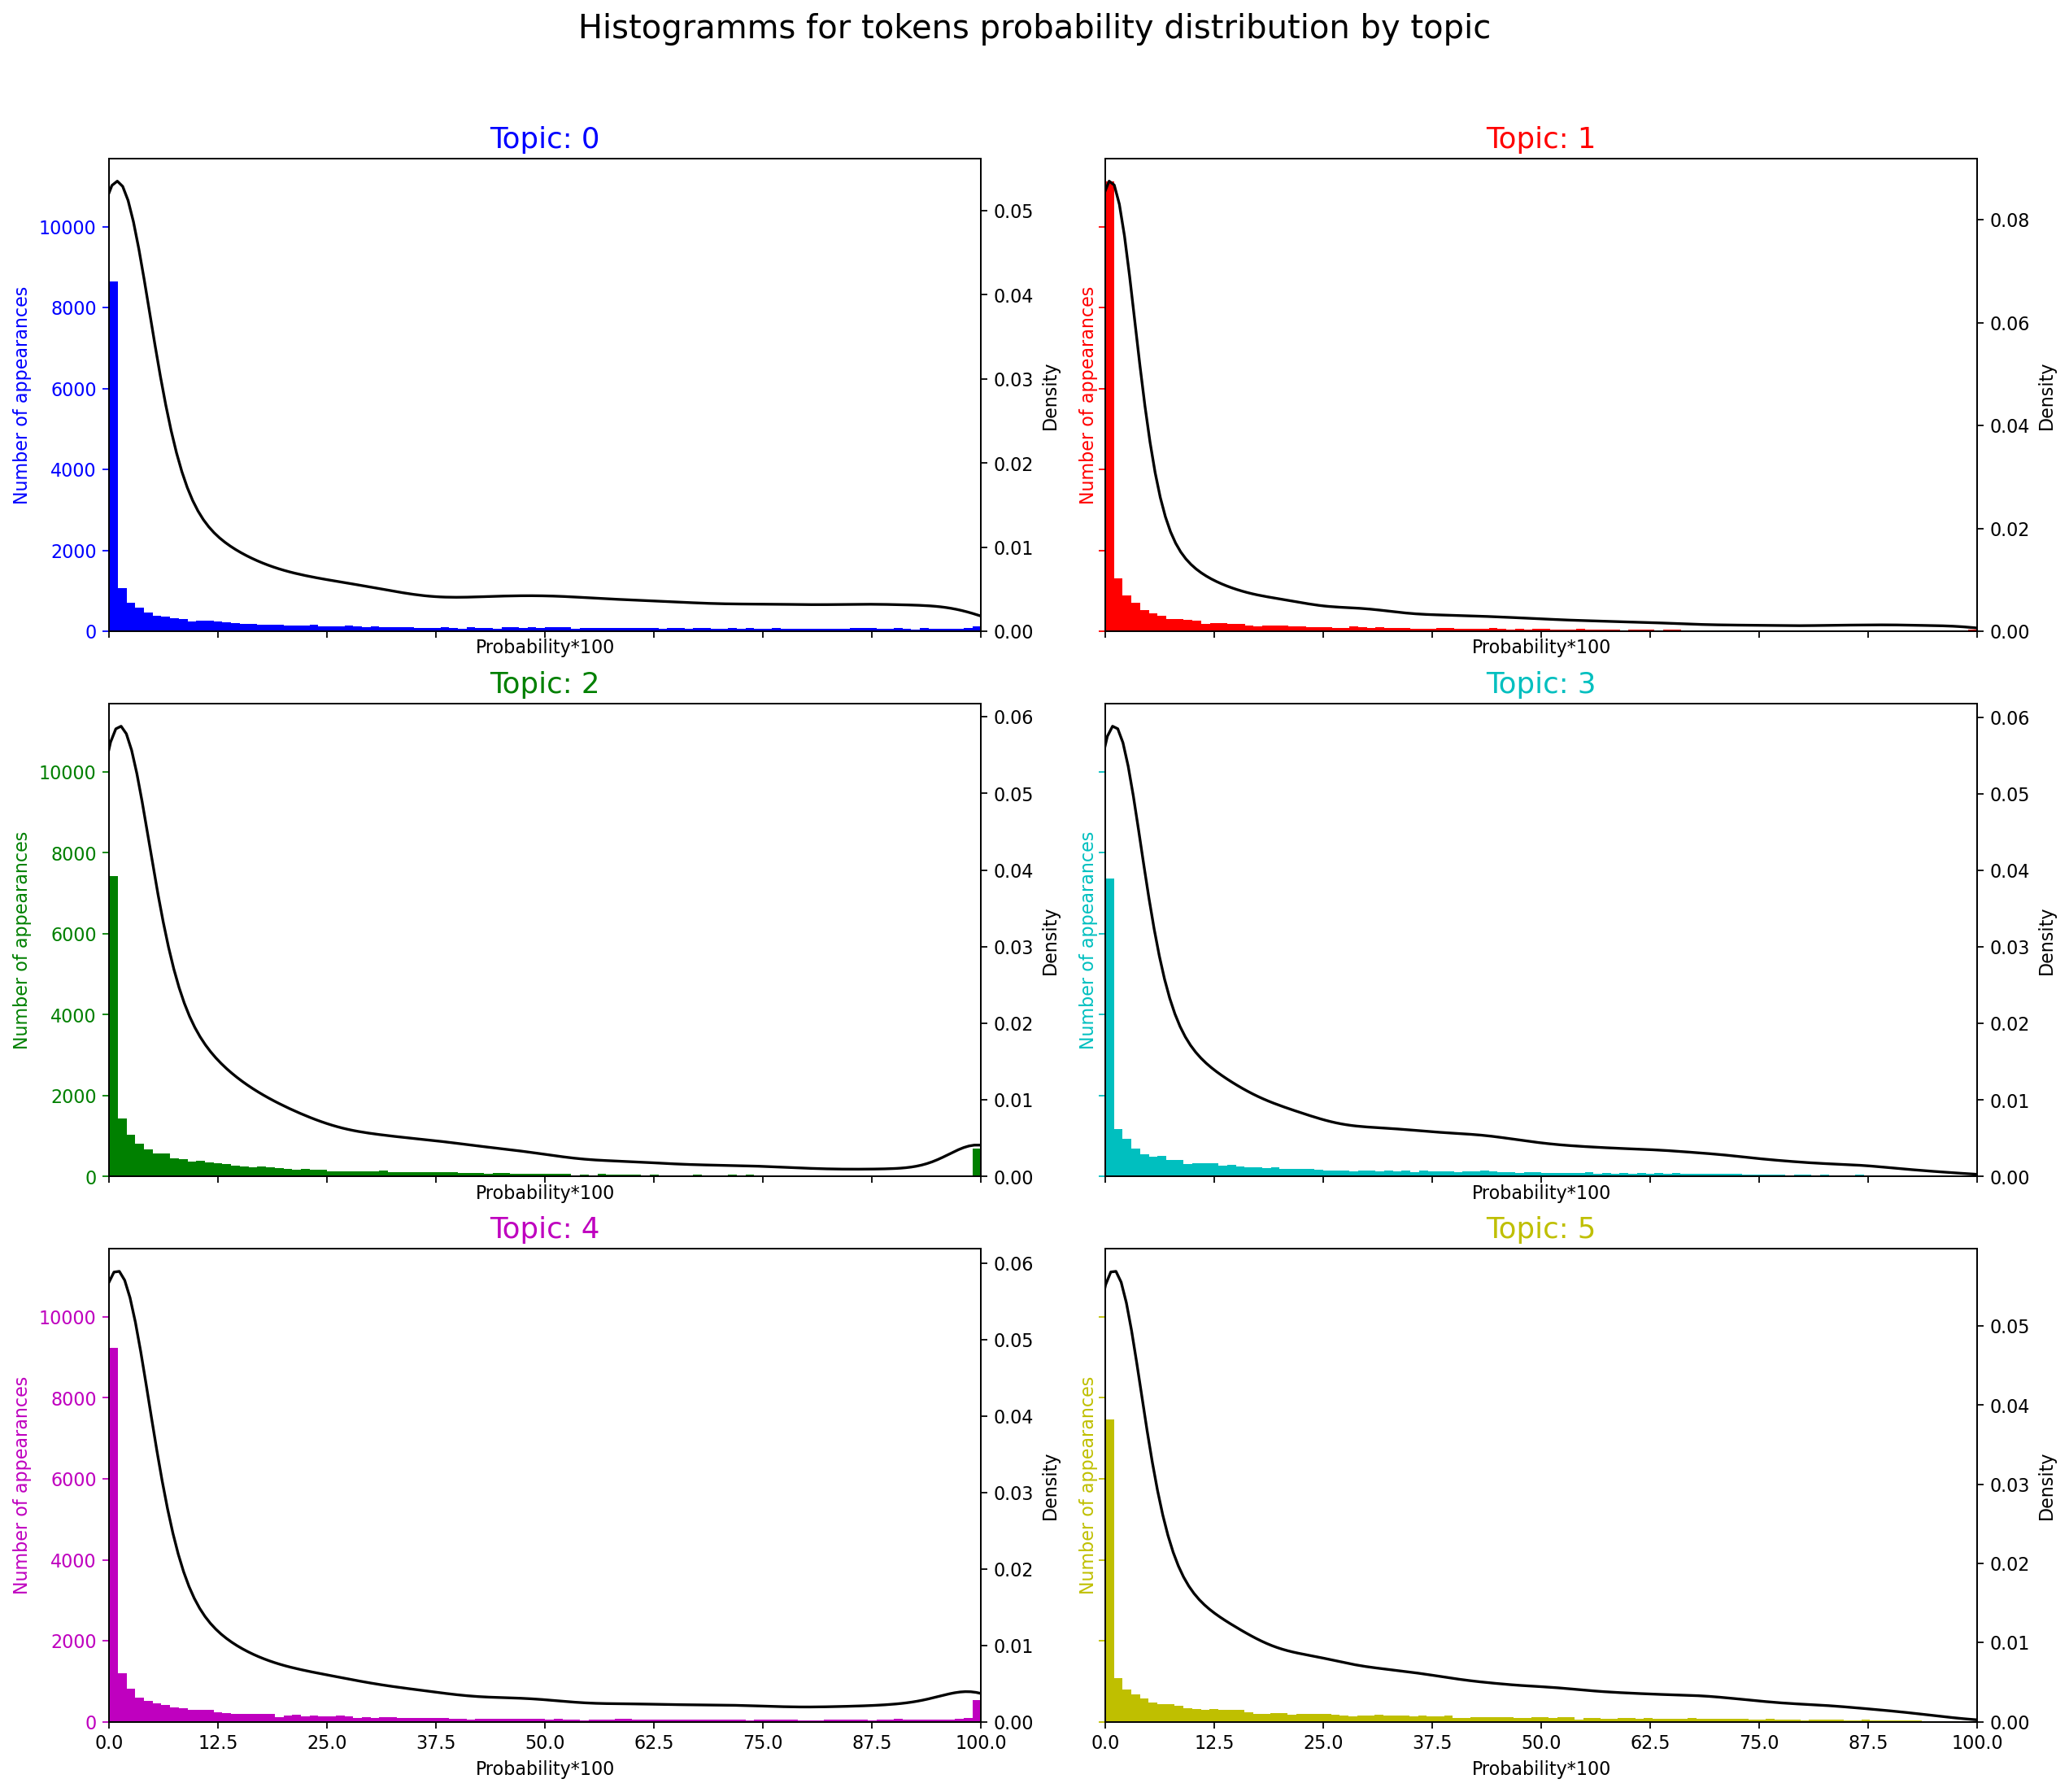

In [155]:
import seaborn as sns
import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols =['b', 'r', 'g', 'c', 'm', 'y']
fig, axes = plt.subplots(3,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):    
#    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    doc_lens = ttp[i]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Probability*100')
    ax.set_ylabel('Number of appearances', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Histogramms for token''s probability distribution by topic', fontsize=18)
plt.show()

Наиболее типичные новости для тем

In [156]:
most_valued_news = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].astype(float).idxmax(axis=0, 
                                                                                                                 skipna=True)

In [158]:
most_valued_news

topic0    21445
topic1     4735
topic2      823
topic3     1543
topic4      609
topic5    14546
dtype: int64

In [157]:
df_excel.head()

Unnamed: 0  News_Id                                         News_Title  \
0           0        1  В СЭИ обсудили экономико-правовое развитие сов...   
1           1        2  Прошла встреча представителей опорного вуза с ...   
2           2        3  Технический университет стал участником семина...   
3           3        4  Объявляется набор на подготовку по программе «...   
4           4        5  В ИнПИТ разработали лучший проект Школы цифров...   

   NumWords  NumUnicTokens                                          NewsWords  
0       136            106  сэи обсудить экономико правовой развитие совре...  
1       113             83  пройти встреча представитель опорный вуз выпус...  
2       228            158  технический университет участник семинар роско...  
3        78             52  объявляться набор подготовка программа строите...  
4       173            129  инпит разработать хороший проект школа цифрово...

In [83]:
for inews in list(most_valued_news):
    news_text = df_excel.loc[inews,['News_Title', 'NewsWords']]
    print ('news № ', inews, ' ',list(news_text))
    

news №  21445   ['МБЦ СГТУ приглашает к сотрудничеству молодых ученых', 'мбц приглашать сотрудничество молодой учёный молодёжный бизнес центр мбц приглашать сотрудничество молодой учёный статья сотрудник центр рассказать задача план развитие мбц мероприятие провести центр год']
news №  4735   ['«Офис проектного менеджмента»: в ИСПМ прошли сессии по защите проектов', 'офис проектный менеджмент испм пройти сессия защита проект институт социальный производственный менеджмент пройти сессия защита паспорт проект участник программа офис проектный менеджмент реализоваться рамка всероссийский конкурс молодёжный инициатива стратегический проект региональный бизнес акселератор концепция программа офис проектный менеджмент отличаться трёхсторонний формат сотрудничество работа группа участвовать предприниматель преподаватель студент подобный формат позволять сочетать теоретический знание преподаватель практический навык предприниматель мнение опытный профессионал яркий оригинальный идея молодой по

# Обработка матрицы Phi тематического моделирования: вероятности отнесения слов к темам


In [159]:
db_words = pd.read_csv('Phi_Topics_6_prime.csv', delimiter=',') 
db_words.head()

Unnamed: 0        topic0        topic1        topic2    topic3  \
0   ('text', 'экономика')  2.712110e-09  3.586179e-07  4.494023e-04  0.002259   
1   ('text', 'шалуновый')  0.000000e+00  0.000000e+00  0.000000e+00  0.000002   
2  ('text', 'приложение')  0.000000e+00  1.351784e-04  2.631853e-04  0.001233   
3    ('text', 'лепилина')  0.000000e+00  8.629858e-06  0.000000e+00  0.000000   
4      ('text', 'бедный')  1.368889e-05  5.840387e-06  1.877589e-07  0.000000   

     topic4    topic5  
0  0.000570  0.002387  
1  0.000000  0.000000  
2  0.000000  0.000047  
3  0.000000  0.000000  
4  0.000003  0.000000

In [160]:
len(db_words.index)

50104

In [161]:
key_words = list(db_words['Unnamed: 0'])
key_words_index = [string_dev(x) for x in key_words]
print (key_words_index.sort)

<built-in method sort of list object at 0x000001B6580831C0>


In [111]:
print (key_words_index)

['экономика', 'шалуновый', 'приложение', 'лепилина', 'бедный', 'биогаз', 'подчеркнуть', 'повториться', 'ограничиться', 'бибарсов', 'пелех', 'мгу', 'маячить', 'закон', 'гостелерадиокомпания', 'кочерга', 'создание', 'четверть', 'козей', 'стена', 'пурынзин', 'опбс', 'агрессия', 'пулевой', 'обыгрывание', 'понимать', 'толоконникова', 'гагарин', 'техника', 'восстанавливаться', 'шемякин', 'взрослеть', 'активно', 'люминесцентный', 'земляк', 'баранецкий', 'сэи', 'дугогасительный', 'аскон', 'данвилл', 'семеноводство', 'метод', 'гашек', 'интуиция', 'муллина', 'особенность', 'портнов', 'свитич', 'электровакуумный', 'должный', 'подсудимый', 'банальность', 'цифровой', 'сменить', 'топ', 'набраться', 'доработка', 'голландит', 'химсталькон', 'изготавливаться', 'романчук', 'важный', 'следовательно', 'кадастровый', 'предварительно', 'органайзер', 'некуда', 'коронавирус', 'раковый', 'подсолнечник', 'откладывать', 'асначева', 'всеобуч', 'обсудить', 'папиросный', 'рыбенко', 'ширин', 'техноавиа', 'качура', '

In [162]:
db_words['Index'] = key_words_index
db_words.head()

Unnamed: 0        topic0        topic1        topic2    topic3  \
0   ('text', 'экономика')  2.712110e-09  3.586179e-07  4.494023e-04  0.002259   
1   ('text', 'шалуновый')  0.000000e+00  0.000000e+00  0.000000e+00  0.000002   
2  ('text', 'приложение')  0.000000e+00  1.351784e-04  2.631853e-04  0.001233   
3    ('text', 'лепилина')  0.000000e+00  8.629858e-06  0.000000e+00  0.000000   
4      ('text', 'бедный')  1.368889e-05  5.840387e-06  1.877589e-07  0.000000   

     topic4    topic5       Index  
0  0.000570  0.002387   экономика  
1  0.000000  0.000000   шалуновый  
2  0.000000  0.000047  приложение  
3  0.000000  0.000000    лепилина  
4  0.000003  0.000000      бедный

In [163]:
db_words = db_words.drop(columns = ['Unnamed: 0'])
db_words.set_index('Index', inplace = True)
db_words.head()

topic0        topic1        topic2    topic3    topic4  \
Index                                                                      
экономика   2.712110e-09  3.586179e-07  4.494023e-04  0.002259  0.000570   
шалуновый   0.000000e+00  0.000000e+00  0.000000e+00  0.000002  0.000000   
приложение  0.000000e+00  1.351784e-04  2.631853e-04  0.001233  0.000000   
лепилина    0.000000e+00  8.629858e-06  0.000000e+00  0.000000  0.000000   
бедный      1.368889e-05  5.840387e-06  1.877589e-07  0.000000  0.000003   

              topic5  
Index                 
экономика   0.002387  
шалуновый   0.000000  
приложение  0.000047  
лепилина    0.000000  
бедный      0.000000

In [164]:
db_words['Key_word'] = key_words_index
db_words.head()

topic0        topic1        topic2    topic3    topic4  \
Index                                                                      
экономика   2.712110e-09  3.586179e-07  4.494023e-04  0.002259  0.000570   
шалуновый   0.000000e+00  0.000000e+00  0.000000e+00  0.000002  0.000000   
приложение  0.000000e+00  1.351784e-04  2.631853e-04  0.001233  0.000000   
лепилина    0.000000e+00  8.629858e-06  0.000000e+00  0.000000  0.000000   
бедный      1.368889e-05  5.840387e-06  1.877589e-07  0.000000  0.000003   

              topic5    Key_word  
Index                             
экономика   0.002387   экономика  
шалуновый   0.000000   шалуновый  
приложение  0.000047  приложение  
лепилина    0.000000    лепилина  
бедный      0.000000      бедный

In [165]:
#print(db_theta.shape)
#print(db_words.shape)

# Формирование списка словарей для описания тем
main_topics = []
for i in range(0,6):
    d_w = db_words[['Key_word', 'topic'+str(i)]]
    d_sel = d_w[d_w['topic'+str(i)] >0]
    d_w_sorted = d_sel.sort_values('topic'+str(i), ascending=False)
    main_tokens = dict(np.array(d_w_sorted[['Key_word', 'topic'+str(i)]]))
    main_topics.append(main_tokens)



In [166]:
print(len(list(db_words.index)))
print(len(list(set(list(db_words['Key_word'])))))
print(len(vocab))

50104
50078
50105


In [117]:
them_model_0_5.head()

topic_0  topic_1  topic_2  topic_3  topic_4  topic_5
0        0        1        0        0        0        0
1        0        1        0        0        0        0
2        1        0        0        1        0        0
3        0        0        0        0        0        1
4        0        0        0        1        0        1

In [167]:
# Отбор из списка словарей n наболее вероятно описывающих темы слов
n = 100
semantic_topic = []
for i in range(0,6):
    semantic_topic.append(list((main_topics[i].keys()))[0:n])

In [96]:
for i in range(0,6):
    print('Токены для темы ', str(i),'\n')
    print(semantic_topic[i])

Токены для темы  0 

['день', 'год', 'студент', 'саратовский', 'гагарин', 'мероприятие', 'музей', 'праздник', 'россия', 'военный', 'первый', 'университет', 'история', 'город', 'акция', 'саратов', 'сотрудник', 'выставка', 'пройти', 'работа', 'война', 'время', 'принять', 'посвятить', 'участие', 'состояться', 'новый', 'гость', 'фестиваль', 'технический', 'великий', 'посетить', 'страна', 'ребёнок', 'победа', 'преподаватель', 'весь', 'мир', 'участник', 'желать', 'встреча', 'ребята', 'учиться', 'колледж', 'память', 'отечественный', 'институт', 'лицей', 'рассказать', 'русский', 'вуз', 'экскурсия', 'народный', 'исторический', 'район', 'государственный', 'культура', 'ветеран', 'область', 'выпускник', 'провести', 'дверь', 'летие', 'творческий', 'событие', 'октябрь', 'друг', 'программа', 'художественный', 'торжественный', 'май', 'слово', 'фильм', 'студенческий', 'коллектив', 'проходить', 'организовать', 'директор', 'праздничный', 'начало', 'корпус', 'искусство', 'традиция', 'работать', 'сентябрь'

In [97]:
for i in range(0,6):
    print('\nТокены для темы ', str(i),' ее описания\n')
#    print(set(semantic_topic[i]).intersection(set(topics[i])))
#    print(set(topics[i]))
#    print('Main tokens ', str(i))
#    print([(x,y) for (x,y) in main_topics[i].items() if x in topics[i]])
    print(list(main_topics[i])[0:50])
    


Токены для темы  0  ее описания

['день', 'год', 'студент', 'саратовский', 'гагарин', 'мероприятие', 'музей', 'праздник', 'россия', 'военный', 'первый', 'университет', 'история', 'город', 'акция', 'саратов', 'сотрудник', 'выставка', 'пройти', 'работа', 'война', 'время', 'принять', 'посвятить', 'участие', 'состояться', 'новый', 'гость', 'фестиваль', 'технический', 'великий', 'посетить', 'страна', 'ребёнок', 'победа', 'преподаватель', 'весь', 'мир', 'участник', 'желать', 'встреча', 'ребята', 'учиться', 'колледж', 'память', 'отечественный', 'институт', 'лицей', 'рассказать', 'русский']

Токены для темы  1  ее описания

['научный', 'наука', 'учёный', 'исследование', 'год', 'российский', 'работа', 'проект', 'научно', 'материал', 'университет', 'журнал', 'новый', 'система', 'россия', 'область', 'сотрудник', 'технический', 'грант', 'разработка', 'кафедра', 'результат', 'профессор', 'автор', 'молодой', 'являться', 'экологический', 'статья', 'государственный', 'фонд', 'премия', 'опубликовать',

In [168]:
res = set.intersection(*map(set, semantic_topic))
#print ("The common elements from highly probably and highly frequently sets of tokens: \n",
#       len(res), len(common_idf), len(res.intersection(set(common_idf.keys()))), '\n',
#      res.intersection(set(common_idf.keys())))
print (len(res))

5


In [169]:
tokens_topic_intersection = set(semantic_topic[5])
for i in range(0,6):
    for j in range(0,6):
        print(i,j,'\n', len(set(semantic_topic[i]).intersection(set(semantic_topic[j]))))



0 0 
 100
0 1 
 15
0 2 
 19
0 3 
 27
0 4 
 32
0 5 
 29
1 0 
 15
1 1 
 100
1 2 
 21
1 3 
 34
1 4 
 14
1 5 
 27
2 0 
 19
2 1 
 21
2 2 
 100
2 3 
 25
2 4 
 19
2 5 
 25
3 0 
 27
3 1 
 34
3 2 
 25
3 3 
 100
3 4 
 32
3 5 
 39
4 0 
 32
4 1 
 14
4 2 
 19
4 3 
 32
4 4 
 100
4 5 
 25
5 0 
 29
5 1 
 27
5 2 
 25
5 3 
 39
5 4 
 25
5 5 
 100


In [170]:
main_tokens['год']

0.007958923

# Частота распределения слов в наборах документов

In [135]:
df_excel.head()

Unnamed: 0  News_Id                                         News_Title  \
0           0        1  В СЭИ обсудили экономико-правовое развитие сов...   
1           1        2  Прошла встреча представителей опорного вуза с ...   
2           2        3  Технический университет стал участником семина...   
3           3        4  Объявляется набор на подготовку по программе «...   
4           4        5  В ИнПИТ разработали лучший проект Школы цифров...   

   NumWords  NumUnicTokens                                          NewsWords  
0       136            106  сэи обсудить экономико правовой развитие совре...  
1       113             83  пройти встреча представитель опорный вуз выпус...  
2       228            158  технический университет участник семинар роско...  
3        78             52  объявляться набор подготовка программа строите...  
4       173            129  инпит разработать хороший проект школа цифрово...

In [171]:
# частота слов в выборке новостей
#import collections
#from collections import Counter
#import re

def listmerge(lstlst):            # объединение в список списков очищамых строк слов 
    al=[]
    for lst in lstlst:
        print('lst', lst)
        al.extend(lst)
    return al

def words_count (num_list):            # Слова с повторами в новостях с номерами в списке num_list
    samp = df_excel.loc[num_list,['NewsWords']]
#    print('samp ',samp)
    temp_list = np.array(samp['NewsWords'])
#    print ('temp', temp_list[0])
    list_d = []
    idf = Counter()
    for list_m in temp_list:
#        list_m = string_dev(i)
#        print ('list_m ', type(list_m[0]))
        lst = list_m.split(' ')
        list_d.extend(lst)
        idf = idf + Counter(lst)
#    print('idf=',len(idf))
#    them_idf = dict(Counter(list_d))
    return list_d

num_list = [2]
words_stat = words_count(num_list)
print ('tokens= ', words_stat)


tokens=  ['технический', 'университет', 'участник', 'семинар', 'роскосмос', 'саратовский', 'государственный', 'технический', 'университет', 'гагарин', 'впервые', 'участник', 'ежегодный', 'научно', 'практический', 'семинар', 'проводить', 'госкорпорация', 'роскосмос', 'мероприятие', 'посетить', 'представитель', 'базовый', 'образовательный', 'организация', 'высокий', 'образование', 'модератор', 'семинар', 'выступить', 'исполнительный', 'директор', 'перспективный', 'программа', 'наука', 'госкорпорация', 'виталиевич', 'блошенко', 'директор', 'департамент', 'кадровый', 'социальный', 'политика', 'владимир', 'владимирович', 'матвейчук', 'начальник', 'отдел', 'оценка', 'обучение', 'персонал', 'михаилович', 'коваль', 'семинар', 'присутствовать', 'представитель', 'предприятие', 'корпорация', 'число', 'ракетный', 'космический', 'система', 'государственный', 'космический', 'научно', 'производственный', 'центр', 'хруничев', 'протон', 'научно', 'производственный', 'центр', 'полюс', 'информационный', 

In [137]:
df_excel.loc[2,'NewsWords']

'технический университет участник семинар роскосмос саратовский государственный технический университет гагарин впервые участник ежегодный научно практический семинар проводить госкорпорация роскосмос мероприятие посетить представитель базовый образовательный организация высокий образование модератор семинар выступить исполнительный директор перспективный программа наука госкорпорация виталиевич блошенко директор департамент кадровый социальный политика владимир владимирович матвейчук начальник отдел оценка обучение персонал михаилович коваль семинар присутствовать представитель предприятие корпорация число ракетный космический система государственный космический научно производственный центр хруничев протон научно производственный центр полюс информационный спутниковый система решетнёв представитель организация высокий образование московский государственный технический университет бауман московский физико технический институт московский авиационный институт российский химико технологи

In [172]:
num_list = list(range(22369))     

sp = words_count(num_list)             # Список слов во всей выборке

print (len(sp))
common_idf = Counter(sp)               # Частоты слов во всей выборке
#print(np.sum(list(dict(common_idf).values())))
#print(dict(common_idf.most_common()).keys())
vect_values = dict(common_idf.most_common()).values()


2660912


In [173]:
# inverted_index_them_mod - множество списков номеров новостей для тем
num_list = inverted_index_them_mod[0]
sp = words_count(num_list) 
print (len(sp))

820225


In [174]:
# vect_values - словарь всех слов в архиве новостей с их частотами по убыванию
vect_values = dict(common_idf.most_common()).values()

In [175]:
# Таблица всех слов в архиве новостей с их частотами по убыванию
freqs = pd.DataFrame(vect_values, columns =['token_frequency'])
freqs.index = dict(common_idf.most_common()).keys()
freqs.head()

token_frequency
год                    30171
студент                26853
работа                 18643
саратовский            17495
университет            16875

In [109]:
print(len(common_idf))

50105


In [110]:
common_idf.most_common

<bound method Counter.most_common of Counter({'год': 30171, 'студент': 26853, 'работа': 18643, 'саратовский': 17495, 'университет': 16875, 'гагарин': 14935, 'конкурс': 14892, 'участие': 14779, 'кафедра': 14320, 'область': 14129, 'проект': 13613, 'технический': 13454, 'программа': 12862, 'научный': 11103, 'россия': 10918, 'государственный': 10817, 'день': 10797, 'место': 10786, 'образование': 10706, 'наука': 10508, 'участник': 10360, 'технология': 10205, 'институт': 10166, 'развитие': 9870, 'пройти': 9865, 'вуз': 9780, 'мероприятие': 9660, 'принять': 8910, 'конференция': 8879, 'российский': 8855, 'новый': 8482, 'международный': 8228, 'обучение': 8134, 'состояться': 7864, 'рамка': 7299, 'центр': 7160, 'саратов': 7119, 'профессиональный': 7094, 'команда': 6989, 'школа': 6898, 'направление': 6855, 'первый': 6751, 'высокий': 6557, 'учёный': 6548, 'организация': 6534, 'система': 6411, 'получить': 6317, 'преподаватель': 6133, 'учебный': 6076, 'бизнес': 5926, 'курс': 5832, 'научно': 5768, 'сту

In [176]:
# Число номеров новостей по темам 
for i in range(set_of_thems):
    print (len(inverted_index_them_mod[i]))

6929
3976
5454
6525
5769
6774


In [177]:
set_of_thems

6

In [178]:
# Вычисление по темам частот слов в виде коллекций "слово"-"частота слова в теме"
them_idf = list()
for i in range(set_of_thems):
    num_list = inverted_index_them_mod[i]
#    print(num_list)
    sp = words_count(num_list)             # Список слов во всей теме

    print (len(sp))
    them_idf.append(Counter(sp))               # Частоты слов во всей выборке


820225
466340
643139
781852
696790
813951


In [179]:
# Частоты слов в темах
for i in range(6):
#    print(inverted_index_them_mod[i])
    q = words_count(inverted_index_them_mod[i])
    them_dict = dict(Counter(q))
    tmp = them_dict.values()
    q = list(them_dict.keys())
    freqs.loc[q,['topic_'+str(i)]]= list(tmp)

In [180]:
freqs.head()

token_frequency  topic_0  topic_1  topic_2  topic_3  topic_4  \
год                    30171   9165.0   5379.0   7403.0   8926.0   7997.0   
студент                26853   8290.0   4709.0   6685.0   7764.0   6799.0   
работа                 18643   5801.0   3414.0   4513.0   5366.0   4653.0   
саратовский            17495   5514.0   2956.0   4340.0   5050.0   4593.0   
университет            16875   5055.0   3040.0   4271.0   5054.0   4319.0   

             topic_5  
год           9210.0  
студент       8153.0  
работа        5807.0  
саратовский   5306.0  
университет   5240.0

In [181]:
import math

In [182]:
def compute_tf(text):
    #На вход берем текст в виде списка (list) слов
    #Считаем частотность всех терминов во входном массиве с помощью 
    #метода Counter библиотеки collections
    tf_text = collections.Counter(text)
    for i in tf_text:
        #для каждого слова в tf_text считаем TF путём деления
        #встречаемости слова на общее количество слов в тексте
        tf_text[i] = tf_text[i]/float(len(text))
    #возвращаем объект типа Counter c TF всех слов текста
    return tf_text

def compute_idf(word, corpus):
#на вход берется слово, для которого считаем IDF
#и корпус документов в виде списка списков слов
        #количество документов, где встречается искомый термин
        #считается как генератор списков
        return math.log10(len(corpus)/sum([1.0 for i in corpus if word in i]))

In [183]:
# По каждой теме частоты слов в ней
them_idf[0]


Counter({'технический': 4092,
         'университет': 5055,
         'участник': 3153,
         'семинар': 857,
         'роскосмос': 19,
         'саратовский': 5514,
         'государственный': 3374,
         'гагарин': 4723,
         'впервые': 242,
         'ежегодный': 293,
         'научно': 1704,
         'практический': 815,
         'проводить': 814,
         'госкорпорация': 50,
         'мероприятие': 2994,
         'посетить': 745,
         'представитель': 1646,
         'базовый': 127,
         'образовательный': 1606,
         'организация': 2021,
         'высокий': 1898,
         'образование': 3135,
         'модератор': 79,
         'выступить': 981,
         'исполнительный': 120,
         'директор': 1491,
         'перспективный': 216,
         'программа': 4112,
         'наука': 3032,
         'виталиевич': 8,
         'блошенко': 1,
         'департамент': 128,
         'кадровый': 192,
         'социальный': 1238,
         'политика': 503,
         'владимир':

In [186]:
# tf-idf по темам

them_tf_rel =[]    # Относительные частоты слов в темах
them_f =[]         # IDF слов в темах (под документом подразумевается набор новостей в теме)
them_tf_idf = []   # TF-IDF слов в темах
len_corpus = sum(list(common_idf.values()))
for i in range(6):
    them = them_idf[i]
    words_count = sum(list((them.values())))
    print (words_count)
#    them_tf_rel.append(dict([(k,n/words_count) for (k,n) in them.items()]))
    them_f.append(dict([(k,math.log10(len_corpus/
                        (1.0 + len(set(inverted_index[k]).intersection(set(inverted_index_them_mod[i]))))))
                        for k in them.keys()]))
                                  #    (1.0+sum([1.0 for i in range(6) if k in them_idf[i].keys()])))) for k in them.keys()]))

for i in range(6):
    #them_tf_idf.append(dict([(k,them_tf_rel[i][k]*them_f[i][k]) for k in them_idf[i].keys()]))
    them_tf_idf.append(dict([(k,them_idf[i][k]*them_f[i][k]) for k in them_idf[i].keys()]))
    print('---------------------------------------------------------------------')    
    print('Наиболее часто встречающиеся слова в теме ', str(i),'\n')
    print(dict(Counter(them_idf[i]).most_common(20)).keys(),'\n')
    
#    print('Наиболее часто встречающиеся слова в теме ', str(i),' по мере относительной частоты слов tf во всей теме','\n')
#    print(dict(Counter(them_tf_rel[i]).most_common(20)).keys(),'\n')
    
    print('Наиболее часто встречающиеся слова в теме ', str(i),' по мере относительной tf*idf слов во всей теме','\n')
    print(dict(Counter(them_tf_idf[i]).most_common(20)),'\n')

820225
466340
643139
781852
696790
813951
---------------------------------------------------------------------
Наиболее часто встречающиеся слова в теме  0 

dict_keys(['год', 'студент', 'работа', 'саратовский', 'университет', 'гагарин', 'конкурс', 'участие', 'область', 'кафедра', 'проект', 'программа', 'технический', 'государственный', 'научный', 'россия', 'участник', 'образование', 'институт', 'день']) 

Наиболее часто встречающиеся слова в теме  0  по мере относительной tf*idf слов во всей теме 

{'год': 25707.812324346265, 'студент': 23988.6017907185, 'работа': 17263.864150420784, 'саратовский': 16450.111265665495, 'университет': 15117.590694190601, 'конкурс': 14964.567422303942, 'гагарин': 13911.38491857963, 'проект': 13905.769360010809, 'область': 13885.314616043723, 'кафедра': 13529.47237930919, 'участие': 13498.08607547321, 'программа': 12965.912779579432, 'технический': 12433.671088382718, 'научный': 10967.984238789499, 'государственный': 10483.61190074087, 'место': 10425.806

In [187]:
tmp = common_idf.values()
doc_lens = list(tmp)
print(len(doc_lens))

50105


In [124]:
np.max(df_excel['NumWords'])


2706

In [188]:
ttp = list(dict(df_excel['NumWords']).values())
print(ttp)

[136, 113, 228, 78, 173, 253, 969, 420, 163, 30, 124, 227, 320, 131, 105, 121, 380, 311, 316, 270, 223, 115, 349, 242, 253, 136, 101, 80, 110, 249, 147, 120, 115, 422, 101, 48, 286, 136, 80, 138, 148, 328, 49, 89, 136, 131, 169, 99, 97, 136, 119, 73, 90, 61, 89, 85, 87, 122, 106, 141, 238, 189, 67, 54, 171, 295, 178, 77, 220, 108, 86, 43, 228, 352, 112, 139, 215, 117, 101, 95, 418, 217, 143, 368, 53, 97, 280, 135, 105, 114, 183, 98, 419, 72, 153, 164, 826, 176, 127, 181, 160, 113, 66, 94, 141, 120, 119, 299, 91, 186, 110, 79, 443, 233, 288, 82, 451, 445, 389, 294, 95, 110, 71, 167, 95, 120, 112, 94, 288, 303, 136, 110, 79, 136, 89, 71, 95, 87, 278, 216, 266, 968, 400, 144, 71, 159, 136, 161, 168, 170, 481, 382, 190, 262, 115, 112, 62, 186, 84, 85, 128, 74, 213, 176, 188, 614, 410, 117, 202, 200, 57, 418, 157, 65, 322, 177, 247, 117, 179, 370, 132, 254, 123, 261, 92, 91, 153, 58, 466, 179, 131, 419, 87, 97, 103, 616, 99, 485, 291, 111, 421, 75, 80, 116, 125, 360, 158, 151, 105, 450, 300

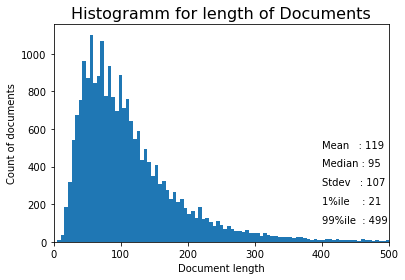

In [189]:
# Гстограмма длин документов
plt.hist(ttp, 500)


#plt.figure(figsize=(10,7), dpi=160)
#plt.hist(ttp, bins = 100, color='navy')
plt.text(400, 500, "Mean   : " + str(round(np.mean(ttp))))
plt.text(400, 400, "Median : " + str(round(np.median(ttp))))
plt.text(400, 300, "Stdev   : " + str(round(np.std(ttp))))
plt.text(400, 200, "1%ile    : " + str(round(np.quantile(ttp, q=0.01))))
plt.text(400, 100, "99%ile  : " + str(round(np.quantile(ttp, q=0.99))))
plt.gca().set(xlim=(0, 500), ylabel='Count of documents', xlabel='Document length')
#plt.tick_params(size=16)
#plt.xticks(np.linspace(0,300,10))
plt.title('Histogramm for length of Documents', fontdict=dict(size=16))
plt.show()

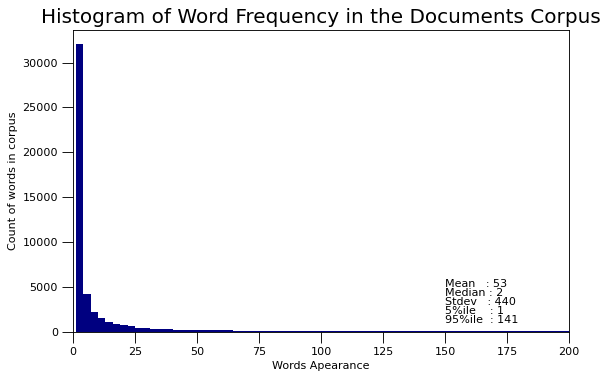

In [190]:
# Plot
plt.figure(figsize=(8,5), dpi=80)
plt.hist(doc_lens, bins = 10000, color='navy')

plt.text(150, 5000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(150, 4000, "Median : " + str(round(np.median(doc_lens))))
plt.text(150, 3000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(150, 2000, "5%ile    : " + str(round(np.quantile(doc_lens, q=0.05))))
plt.text(150, 1000, "95%ile  : " + str(round(np.quantile(doc_lens, q=0.95))))
plt.gca().set(xlim=(0, 200), ylabel='Count of words in corpus', xlabel='Words Apearance')
plt.tick_params(size=10)
plt.xticks(np.linspace(0,200,9))
plt.title('Histogram of Word Frequency in the Documents Corpus', fontdict=dict(size=18))
plt.show()

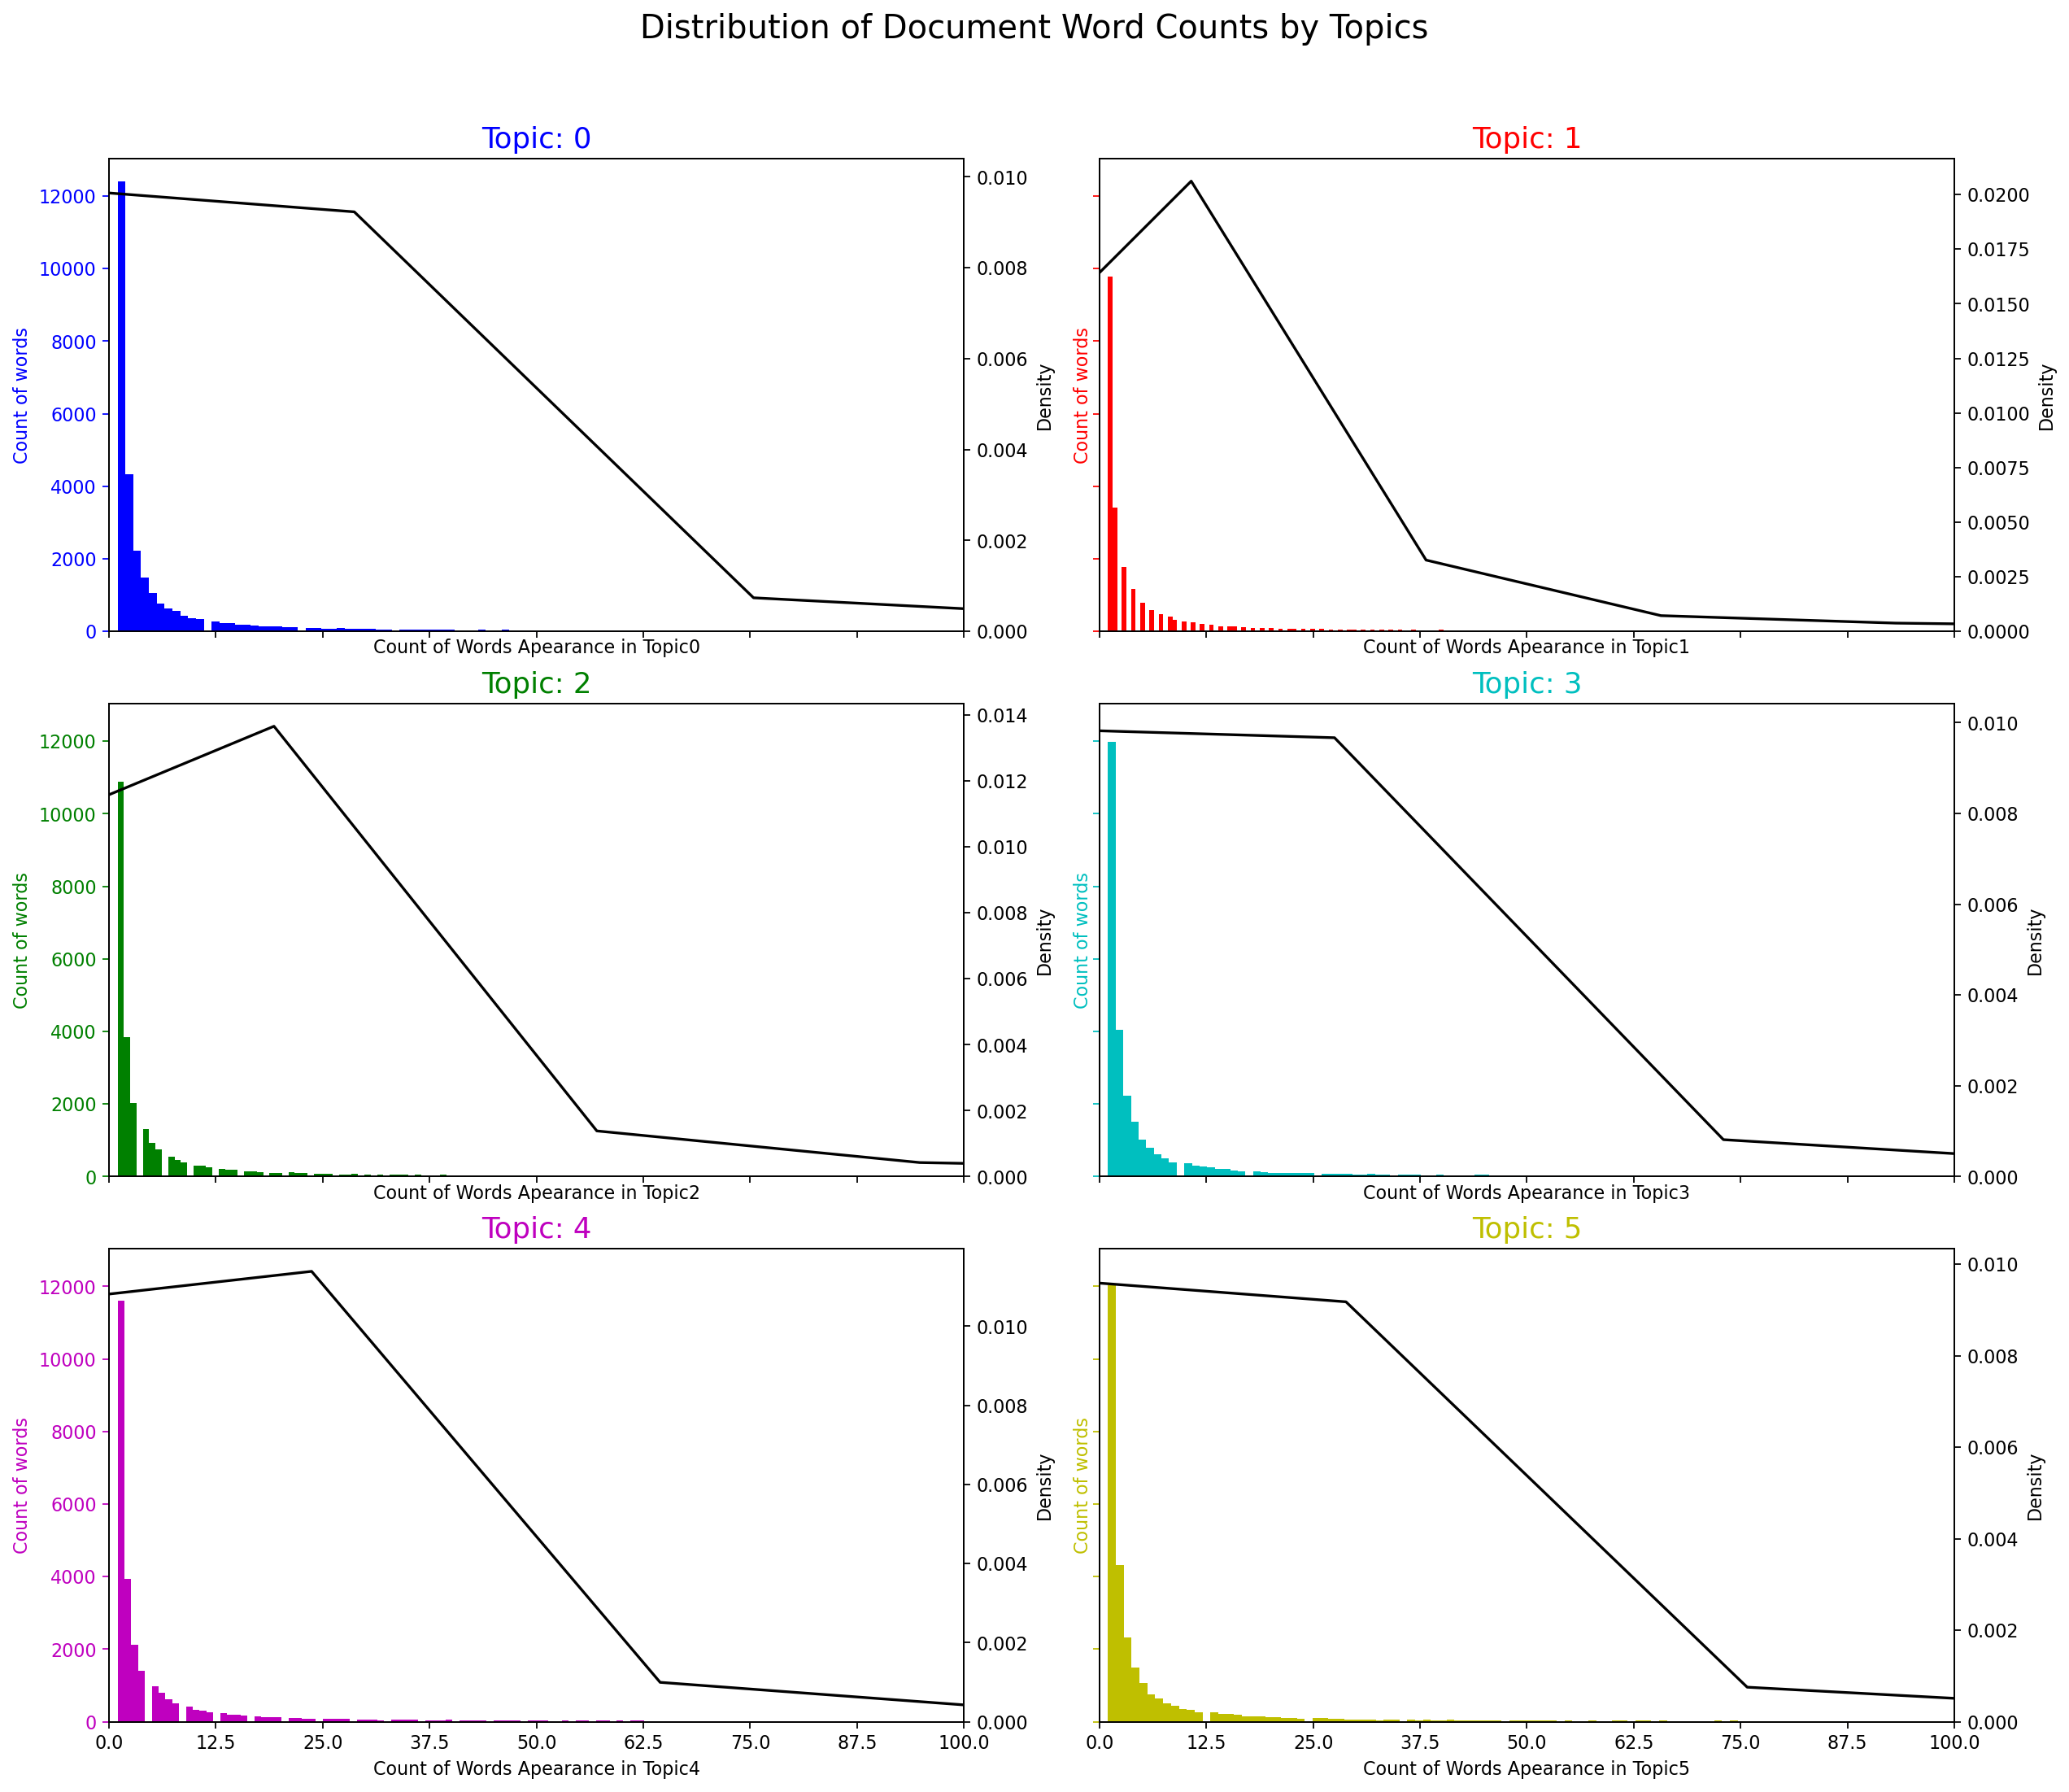

In [191]:
import seaborn as sns
import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols =['b', 'r', 'g', 'c', 'm', 'y']
fig, axes = plt.subplots(3,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):    
#    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    doc_lens = list(them_idf[i].values())
    ax.hist(doc_lens, bins = 10000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 100), xlabel='Count of Word''s Apearance in Topic'+str(i))
    ax.set_ylabel('Count of words', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,100,9))
fig.suptitle('Distribution of Document Word Counts by Topics', fontsize=18)
plt.show()

In [192]:
num_tf_idf = []                # Частоты tf-idf слов в темах

for i in range(6):
    q = them_tf_idf[i]
    r = list(q.values())
    r.sort()
    num_tf_idf.append(r)
    print(len(num_tf_idf[i]))

30403
23350
26669
29305
28239
30026


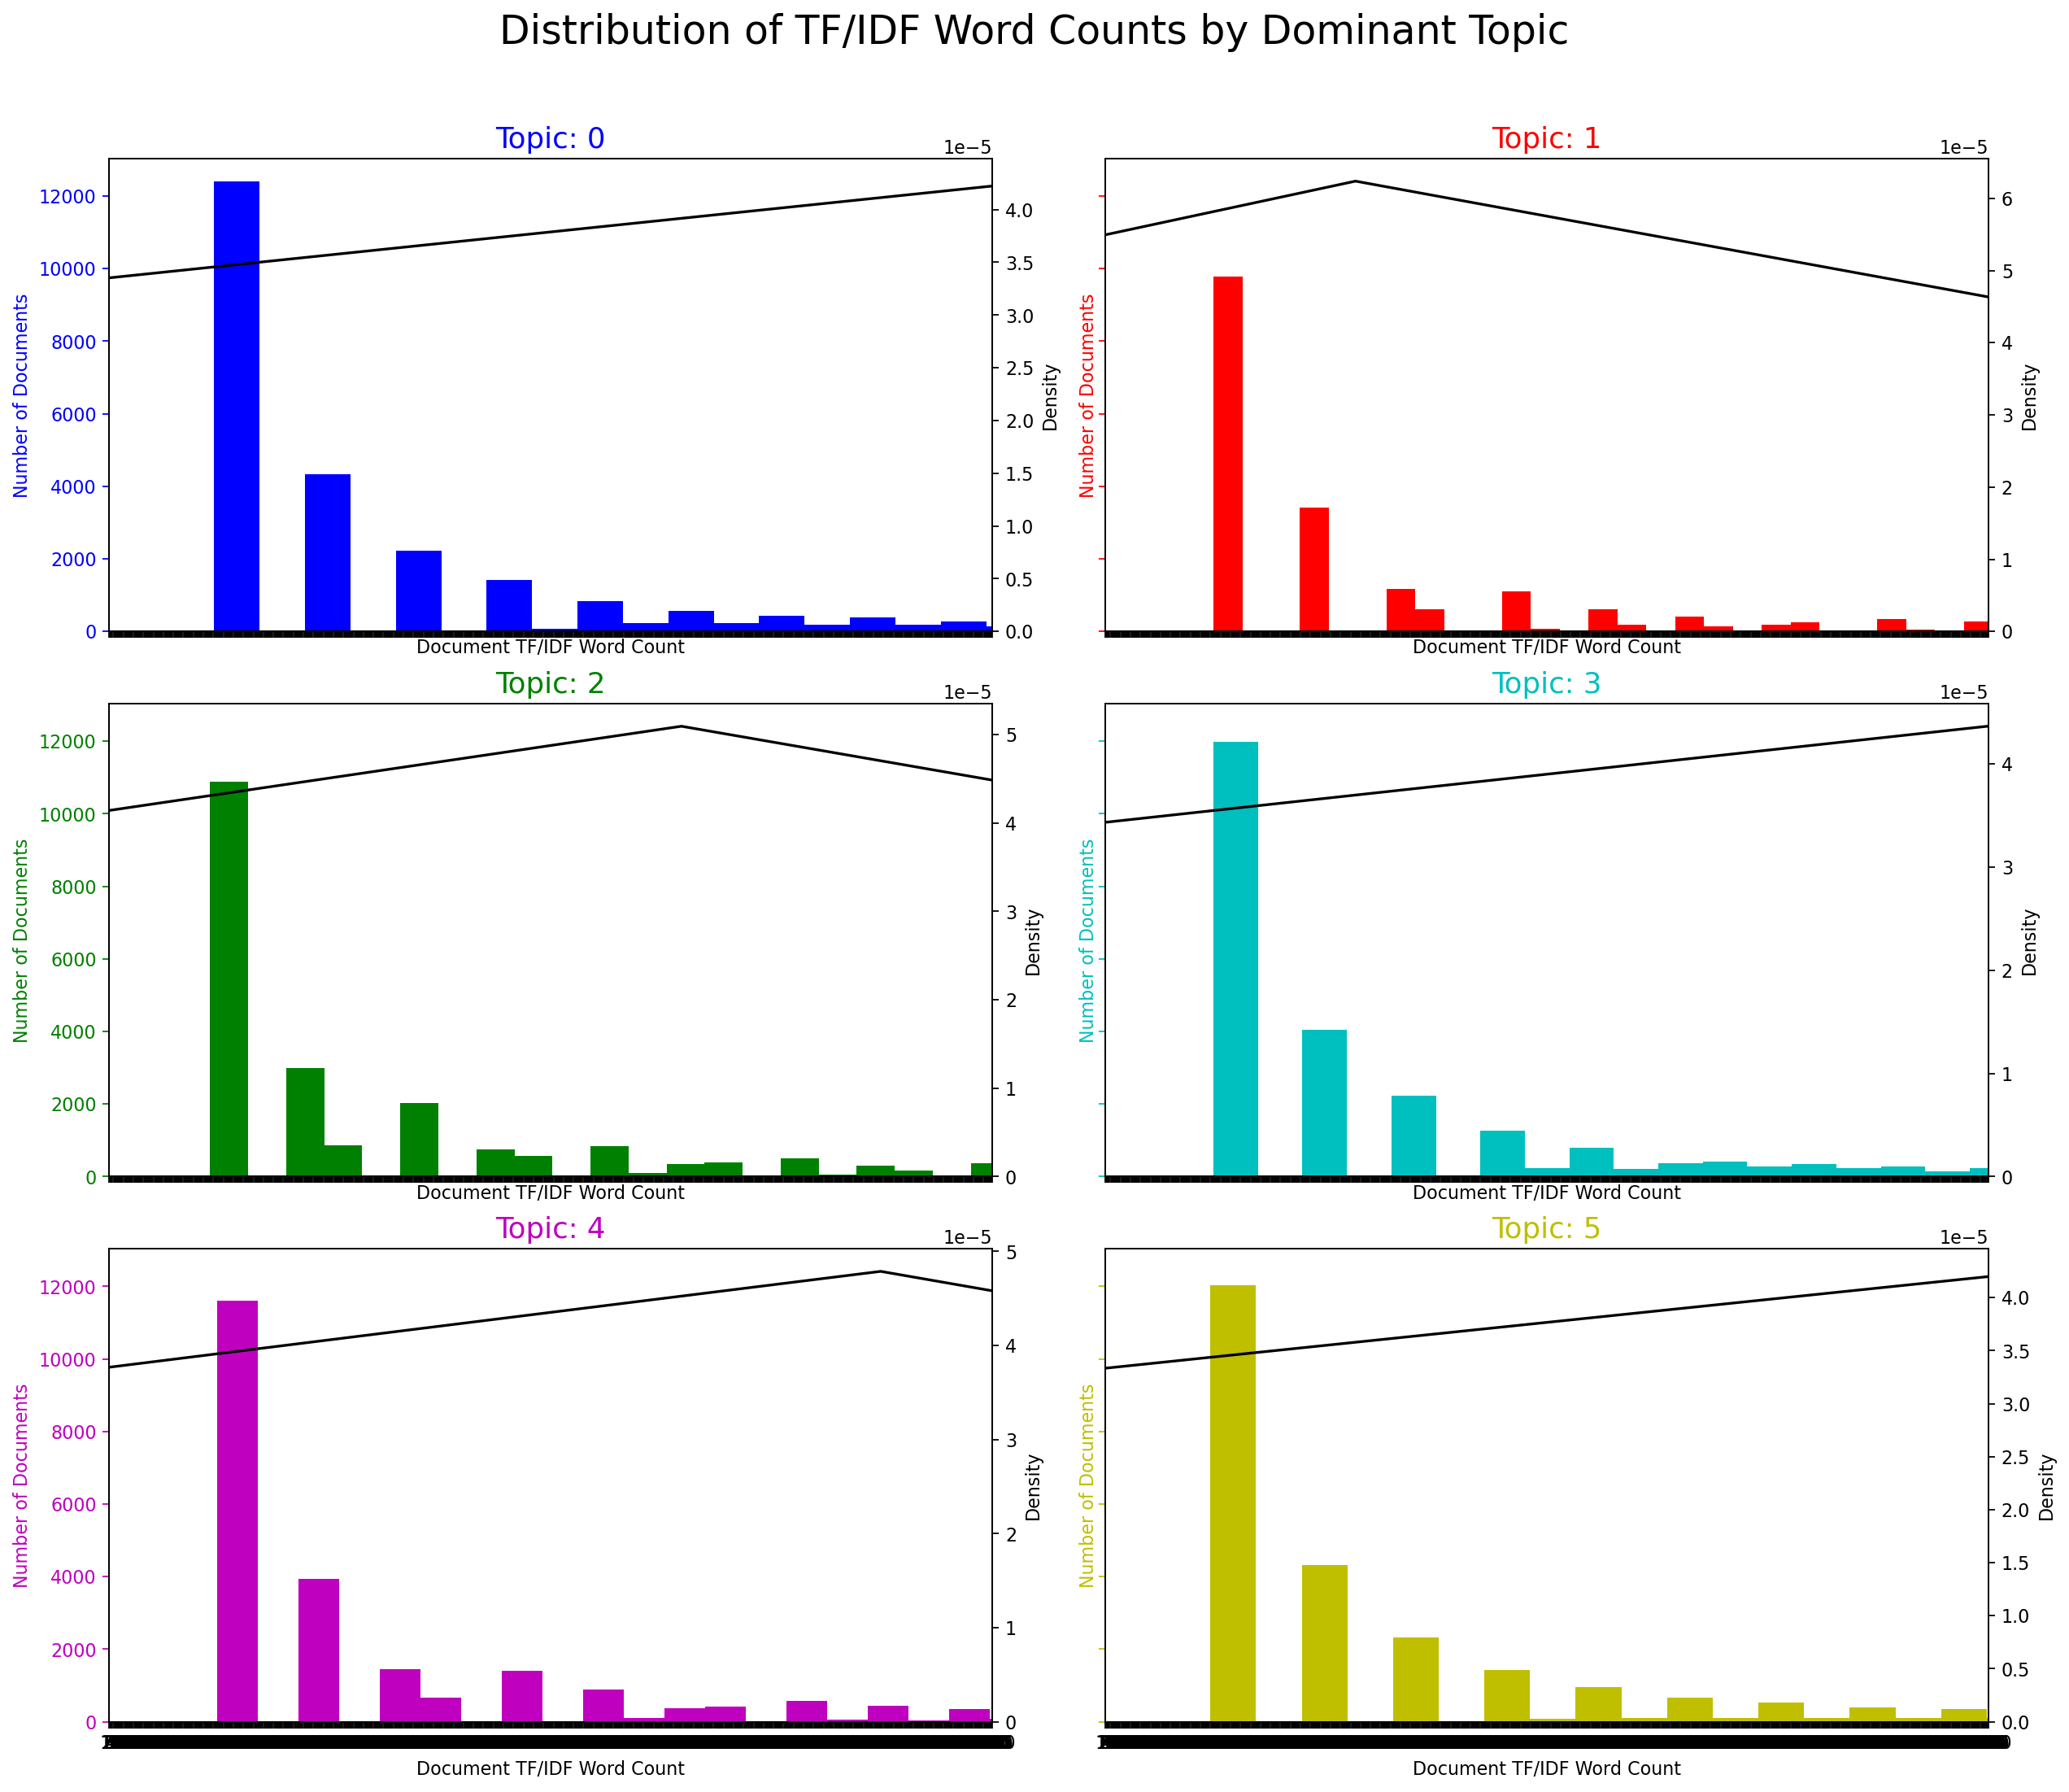

In [193]:
import seaborn as sns
import matplotlib.colors as mcolors
#cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
cols =['b', 'r', 'g', 'c', 'm', 'y']
fig, axes = plt.subplots(3,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):    
#    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
#    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    doc_lens = list(np.array(num_tf_idf[i])*100)
    ax.hist(doc_lens, bins = 10000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 5000), xlabel='Document TF/IDF Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))
fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,5000,999))
fig.suptitle('Distribution of TF/IDF Word Counts by Dominant Topic', fontsize=22)
plt.show()

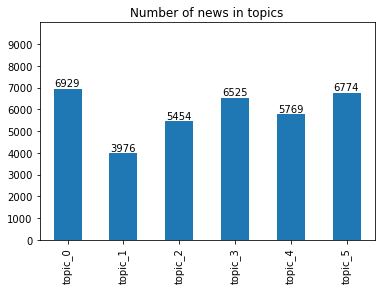

In [140]:

g = them_sum.plot.bar(title = 'Number of news in topics', yticks =range(0,10000,1000), ylim = ([0,10000]),
                      grid =False, legend=False)
m = list(np.array(them_sum['Number of docs']))
marks = [(x,str(x)) for x in m]

for date, label in enumerate(list(them_sum.index)):
    g.annotate(m[date], xy=(date, date + 40),
                xytext=(-13,m[date]/45.5),
                textcoords='offset points')
#plt.savefig('hist_thems.png')

# Построение инвертированного индекса для словаря

In [141]:
#df = pd.read_excel('path_to_file_without_stem1.xlsx') 
df_excel.head()

Unnamed: 0  News_Id                                         News_Title  \
0           0        1  В СЭИ обсудили экономико-правовое развитие сов...   
1           1        2  Прошла встреча представителей опорного вуза с ...   
2           2        3  Технический университет стал участником семина...   
3           3        4  Объявляется набор на подготовку по программе «...   
4           4        5  В ИнПИТ разработали лучший проект Школы цифров...   

   NumWords  NumUnicTokens                                          NewsWords  
0       136            106  сэи обсудить экономико правовой развитие совре...  
1       113             83  пройти встреча представитель опорный вуз выпус...  
2       228            158  технический университет участник семинар роско...  
3        78             52  объявляться набор подготовка программа строите...  
4       173            129  инпит разработать хороший проект школа цифрово...

In [194]:
len(vocab)

50105

In [185]:
inverted_index = {}     # Списки новостей, в которых есть слово
# множество списков номеров новостей для каждого слова
for w in vocab:         # Инициализация словаря списков
    inverted_index[w]=list()

for i in range(df_excel.shape[0]):
    samp = df_excel.at[i, 'NewsWords']
#    print ('samp ', samp) 
    list_m = string_dev(samp)
#    print('list_m ', list_m)
    words_list = list_m.split(' ')
    
    for w in words_list:
        if w in vocab:
            inverted_index[w].append(i)


In [195]:
print(len(inverted_index))
print (len(inverted_index['наука']))

50105
10508


# Распределение новостей по кластерам

In [196]:
topics = {}

w_topic_0 = ['день', 'год', 'студент', 'саратовский', 'гагарин', 'мероприятие', 'музей', 'россия', 'праздник', 'первый', 
             'история', 'университет', 'город', 'акция', 'военный', 'саратов', 'сотрудник', 'выставка', 'работа', 
             'пройти', 'война', 'время','принять', 'посвятить', 'участие', 'фестиваль', 'новый', 'гость', 'состояться', 
             'великий', 'ребёнок', 'посетить', 'страна', 'победа', 'участник', 'весь', 'технический', 'мир', 'преподаватель', 
             'ребята', 'желать', 'встреча', 'район', 'учиться', 'колледж', 'память', 'отечественный', 'институт', 'лицей', 
             'рассказать']
w_topic_1 = ['научный', 'наука', 'учёный', 'год', 'исследование', 'российский', 'работа', 'проект', 'материал', 'научно', 
             'система', 'университет', 'журнал', 'новый', 'технический', 'конкурс', 'разработка', 'кафедра', 'результат', 
             'область', 'грант', 'сотрудник', 'россия', 'молодой', 'профессор', 'автор', 'технология', 'государственный', 
             'являться', 'премия', 'фонд', 'федерация', 'статья', 'опубликовать', 'исследовательский', 'высокий', 'получить', 
             'издание', 'библиотека', 'данные', 'публикация', 'президент', 'сайт', 'метод', 'аспирант', 'база', 'ран', 
             'создание', 'доступ', 'время']
w_topic_2 = ['обучение', 'программа', 'год', 'профессиональный', 'технический', 'подготовка', 'государственный', 'образование', 
             'университет', 'гагарин', 'курс', 'учебный', 'заявка', 'занятие', 'саратовский', 'диплом', 'дополнительный', 
             'направление', 'студент', 'работа', 'набор', 'час', 'приём', 'электронный', 'квалификация', 'повышение', 
             'телефон', 'слушатель', 'иметь', 'высокий', 'деятельность', 'документ', 'корпус', 'область', 'начало', 'система', 
             'специальность', 'группа', 'сайт', 'тело', 'образец', 'вуз', 'транспортный', 'форма', 'строительство', 'окончание',
             'управление', 'лицо', 'приглашать', 'приниматься']

w_topic_3 = ['кафедра', 'конференция', 'работа', 'технология', 'международный', 'участие', 'университет', 'школа', 'студент', 
             'информационный', 'институт', 'научный', 'профессор', 'принять', 'научно', 'технический', 'гагарин', 
             'государственный', 'доцент', 'доклад', 'состояться', 'язык', 'участник', 'преподаватель', 'саратовский', 
             'рамка', 'проблема', 'компьютерный', 'семинар', 'пройти', 'современный', 'класс', 'год', 'мероприятие', 
             'факультет', 'экология', 'система', 'учёный', 'область', 'направление', 'экологический', 'практический', 
             'представить', 'дизайн', 'управление', 'наука', 'прикладной', 'развитие', 'вопрос', 'тема']
w_topic_4 = ['конкурс', 'место', 'студент', 'команда', 'победитель', 'год', 'участие', 'олимпиада', 'соревнование', 
             'студенческий', 'участник', 'пройти', 'гагарин', 'саратовский', 'номинация', 'итог', 'хороший', 'среди', 
             'состояться', 'принять', 'игра', 'фестиваль', 'занять', 'этап', 'первый', 'группа', 'спортивный', 'саратов', 
             'спорт', 'университет', 'всероссийский', 'институт', 'работа', 'колледж', 'область', 'проходить', 'курс', 
             'технический', 'тур', 'кафедра', 'творческий', 'жюри', 'вуз', 'призёр', 'чемпионат', 'наградить', 'испм', 
             'студентка', 'мероприятие', 'получить']
w_topic_5 = ['проект', 'развитие', 'область', 'бизнес', 'образование', 'студент', 'год', 'саратовский', 'вуз', 'россия', 
             'работа', 'российский', 'организация', 'ирбис', 'регион', 'новый', 'центр', 'участие', 'компания', 'мероприятие', 
             'участник', 'образовательный', 'программа', 'представитель', 'высокий', 'институт', 'директор', 'университет', 
             'предприятие', 'возможность', 'вопрос', 'инновационный', 'молодёжный', 'сфера', 'форум', 'отметить', 
             'министерство', 'наука', 'молодой', 'страна', 'молодёжь', 'рамка', 'реализация', 'специалист', 'социальный', 
             'деятельность', 'школа', 'поддержка', 'направление', 'федеральный']
topics[0] = w_topic_0
topics[1] = w_topic_1
topics[2] = w_topic_2
topics[3] = w_topic_3
topics[4] = w_topic_4
topics[5] = w_topic_5
topics[0][1]


'год'

In [ ]:
#!pip install supervenn --user

In [197]:
sets_of_topics = list()
for i in range(6):
    sets_of_topics.append(set(inverted_index_them_mod[i]))
sets_of_topics[0]

{2,
 10,
 11,
 12,
 13,
 14,
 19,
 20,
 21,
 25,
 26,
 29,
 34,
 36,
 37,
 40,
 41,
 42,
 44,
 49,
 50,
 51,
 53,
 54,
 59,
 60,
 65,
 68,
 69,
 70,
 82,
 83,
 85,
 87,
 89,
 94,
 99,
 100,
 103,
 104,
 105,
 106,
 111,
 116,
 120,
 124,
 126,
 153,
 158,
 167,
 177,
 179,
 185,
 187,
 195,
 200,
 207,
 209,
 214,
 215,
 219,
 221,
 228,
 231,
 235,
 238,
 248,
 249,
 250,
 258,
 264,
 266,
 267,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 284,
 285,
 288,
 289,
 290,
 299,
 300,
 301,
 302,
 305,
 311,
 313,
 317,
 318,
 322,
 323,
 325,
 328,
 333,
 335,
 340,
 345,
 348,
 352,
 353,
 356,
 357,
 358,
 362,
 365,
 367,
 368,
 371,
 374,
 377,
 378,
 380,
 381,
 383,
 386,
 387,
 389,
 393,
 399,
 403,
 404,
 406,
 419,
 421,
 423,
 425,
 426,
 442,
 449,
 450,
 463,
 468,
 472,
 474,
 479,
 484,
 487,
 490,
 493,
 504,
 505,
 508,
 511,
 512,
 515,
 519,
 520,
 521,
 528,
 532,
 539,
 551,
 572,
 575,
 577,
 580,
 581,
 584,
 588,
 590,
 593,
 595,
 604,
 606,
 608,
 611,
 615,
 616,


In [ ]:
from supervenn import supervenn
sets = sets_of_topics
labels = ['Events and Commemorative Days', 'Science and Research', 'Learning and Educational Services', 'Educational and Scientific Activities', 
          'Students Competitions', 'Youth Projects and Innovations']
supervenn(sets, labels, figsize=(20, 6), sets_ordering='minimize gaps', 
          col_annotations_ys_count=1, min_width_for_annotation = 10,
          widths_minmax_ratio = 0.1, rotate_col_annotations=True, col_annotations_area_height=1.2)
#plt.savefig('SuperVenn.png')

In [ ]:
w_topic_0

C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:376: UserWarning: Parameters figsize and dpi of supervenn() are deprecated and will be removed in a future version.
Instead of this:
    supervenn(sets, figsize=(8, 5), dpi=90)
Please either do this:
    plt.figure(figsize=(8, 5), dpi=90)
    supervenn(sets)
or plot into an existing axis by passing it as the ax argument:
    supervenn(sets, ax=my_axis)

  warnings.warn(
C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:171: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(xy=(0.5 * sum(col_widths), annot_y), s=str(annotation),
C:\Users\spaps\AppData\Roaming\Python\Python38\site-packages\supervenn\_plots.py:186: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old 

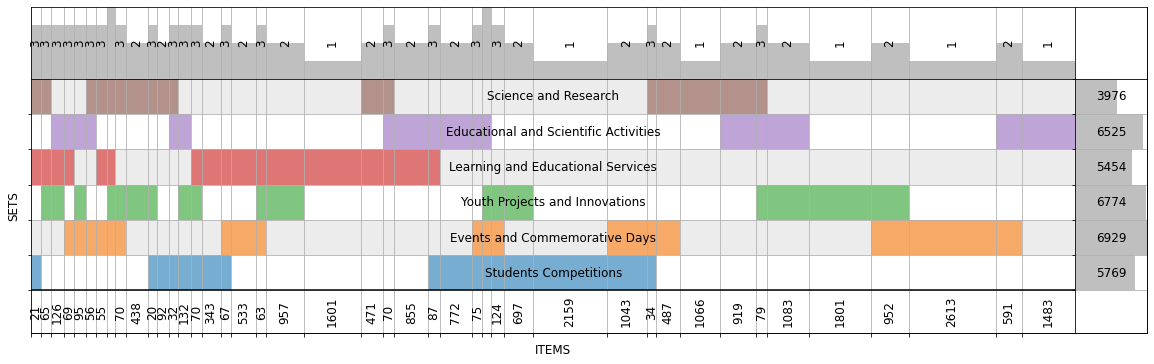

In [198]:
sets = sets_of_topics
labels = ['Events and Commemorative Days', 'Science and Research', 'Learning and Educational Services', 'Educational and Scientific Activities', 
          'Students Competitions', 'Youth Projects and Innovations']
supervenn(sets, labels, figsize=(20, 6), sets_ordering='minimize gaps', 
          col_annotations_ys_count=1, min_width_for_annotation = 10,
          widths_minmax_ratio = 0.1, rotate_col_annotations=True, col_annotations_area_height=1.2)
plt.savefig('SuperVenn.png', dpi = 600, bbox_inches='tight')

In [199]:
!pip3 install wordcloud

In [ ]:
len(vocab)


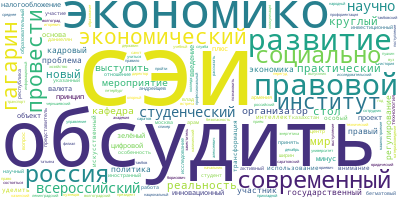

In [200]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
from wordcloud import WordCloud, STOPWORDS
long_string = ','.join(list(vocab))

# Create a WordCloud object
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color="white", 
                      max_words=5000, 
                      contour_width=3, 
                      contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Токены для темы  0  ее описания



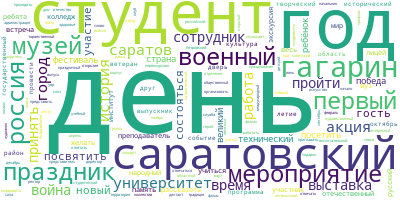

In [149]:
i = 0
print('Токены для темы ', str(i),' ее описания\n')
long_string = ','.join(list(main_topics[i])[0:500])

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelred')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()
    


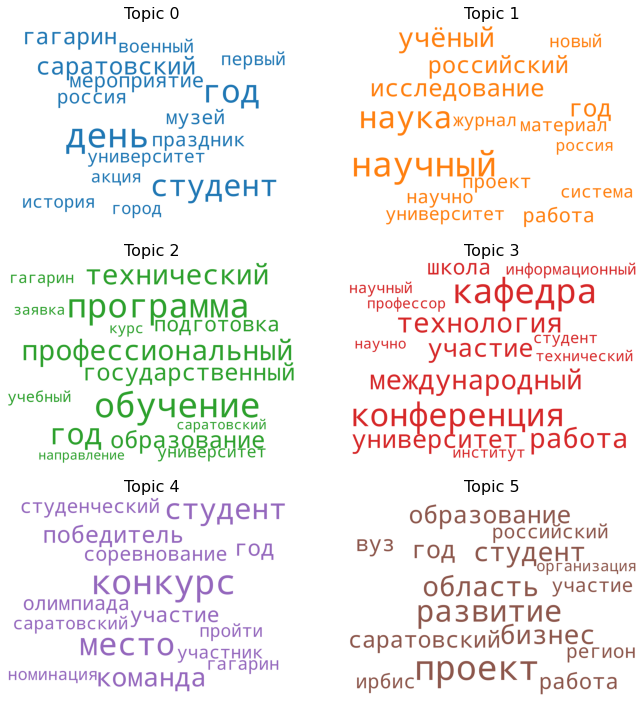

In [201]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors


cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'
#cols =['b', 'r', 'g', 'c', 'm', 'y']

cloud = WordCloud(stopwords=STOPWORDS,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = main_topics

fig, axes = plt.subplots(3, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    
    topics_count = Counter(main_topics[i])
    topic_words = dict(topics_count)
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Word Counts of Topic Keywords

In [202]:
# Убираем из таблицы строки с дублирующими индексами (осталяем первую встретившуюся) 
r = db_words.loc[~db_words.index.duplicated(keep='first')]
r.loc['россия']

topic0      0.005599
topic1      0.004318
topic2      0.000493
topic3      0.002437
topic4      0.002134
topic5      0.007097
Key_word      россия
Name: россия, dtype: object

In [203]:
rq = dict(r.loc[dict(Counter(them_idf[0]).most_common(20)).keys(),'topic'+str(0)]).items()
print (rq)

dict_items([('год', 0.017361538), ('студент', 0.014978927), ('работа', 0.0038580266), ('саратовский', 0.00899197), ('университет', 0.0048129885), ('гагарин', 0.007868583), ('конкурс', 3.6008004e-12), ('участие', 0.0034161638), ('область', 0.002041647), ('кафедра', 0.0006764226), ('проект', 5.982861e-08), ('программа', 0.0018417925), ('технический', 0.0031528773), ('государственный', 0.0021774208), ('научный', 1.8507365e-09), ('россия', 0.005599295), ('участник', 0.002872586), ('образование', 0.00025035106), ('институт', 0.0024216913), ('день', 0.019662216)])


In [204]:
for i in range(6):
    print('---------------------------------------------------------------------')    
    print('Наиболее часто встречающиеся слова в теме ', str(i),'\n')
#    print(dict(Counter(them_idf[i]).most_common(20)).items(),'\n')
    print(dict(Counter(them_idf[i]).most_common(20)).items())

---------------------------------------------------------------------
Наиболее часто встречающиеся слова в теме  0 

dict_items([('год', 9165), ('студент', 8290), ('работа', 5801), ('саратовский', 5514), ('университет', 5055), ('гагарин', 4723), ('конкурс', 4560), ('участие', 4519), ('область', 4496), ('кафедра', 4387), ('проект', 4282), ('программа', 4112), ('технический', 4092), ('государственный', 3374), ('научный', 3351), ('россия', 3199), ('участник', 3153), ('образование', 3135), ('институт', 3118), ('день', 3117)])
---------------------------------------------------------------------
Наиболее часто встречающиеся слова в теме  1 

dict_items([('год', 5379), ('студент', 4709), ('работа', 3414), ('университет', 3040), ('саратовский', 2956), ('конкурс', 2867), ('гагарин', 2571), ('участие', 2566), ('технический', 2436), ('кафедра', 2430), ('проект', 2407), ('область', 2368), ('программа', 2137), ('научный', 2057), ('день', 2025), ('образование', 1958), ('россия', 1929), ('государств

In [205]:
# from collections import Counter
topics = main_topics
#data_flat = [w for w_list in data_ready for w in w_list]
#counter = Counter(data_flat)
counter = common_idf

out = []
for i in range(6):
    topics_from_phi = dict(r.loc[dict(Counter(them_idf[i]).most_common(20)).keys(),
                                        'topic'+str(i)]).items()
    for (word, weight) in topics_from_phi:
         out.append([word, i , weight, counter[word]])

df1 = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


In [206]:
df1.loc[df1.topic_id==1, :]

word  topic_id  importance  word_count
20              год         1    0.010192       30171
21          студент         1    0.000450       26853
22           работа         1    0.006746       18643
23      университет         1    0.005521       16875
24      саратовский         1    0.001143       17495
25          конкурс         1    0.000708       14892
26          гагарин         1    0.001685       14935
27          участие         1    0.000502       14779
28      технический         1    0.003980       13454
29          кафедра         1    0.003920       14320
30           проект         1    0.006160       13613
31          область         1    0.004289       14129
32        программа         1    0.000247       12862
33          научный         1    0.021923       11103
34             день         1    0.000194       10797
35      образование         1    0.000113       10706
36           россия         1    0.004318       10918
37  государственный         1    0.003001       10817
38            наука         1    0.017476       10508
39            место         1    0.000229       10786

<ipython-input-208-0e00680cd577>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df1.loc[df1.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


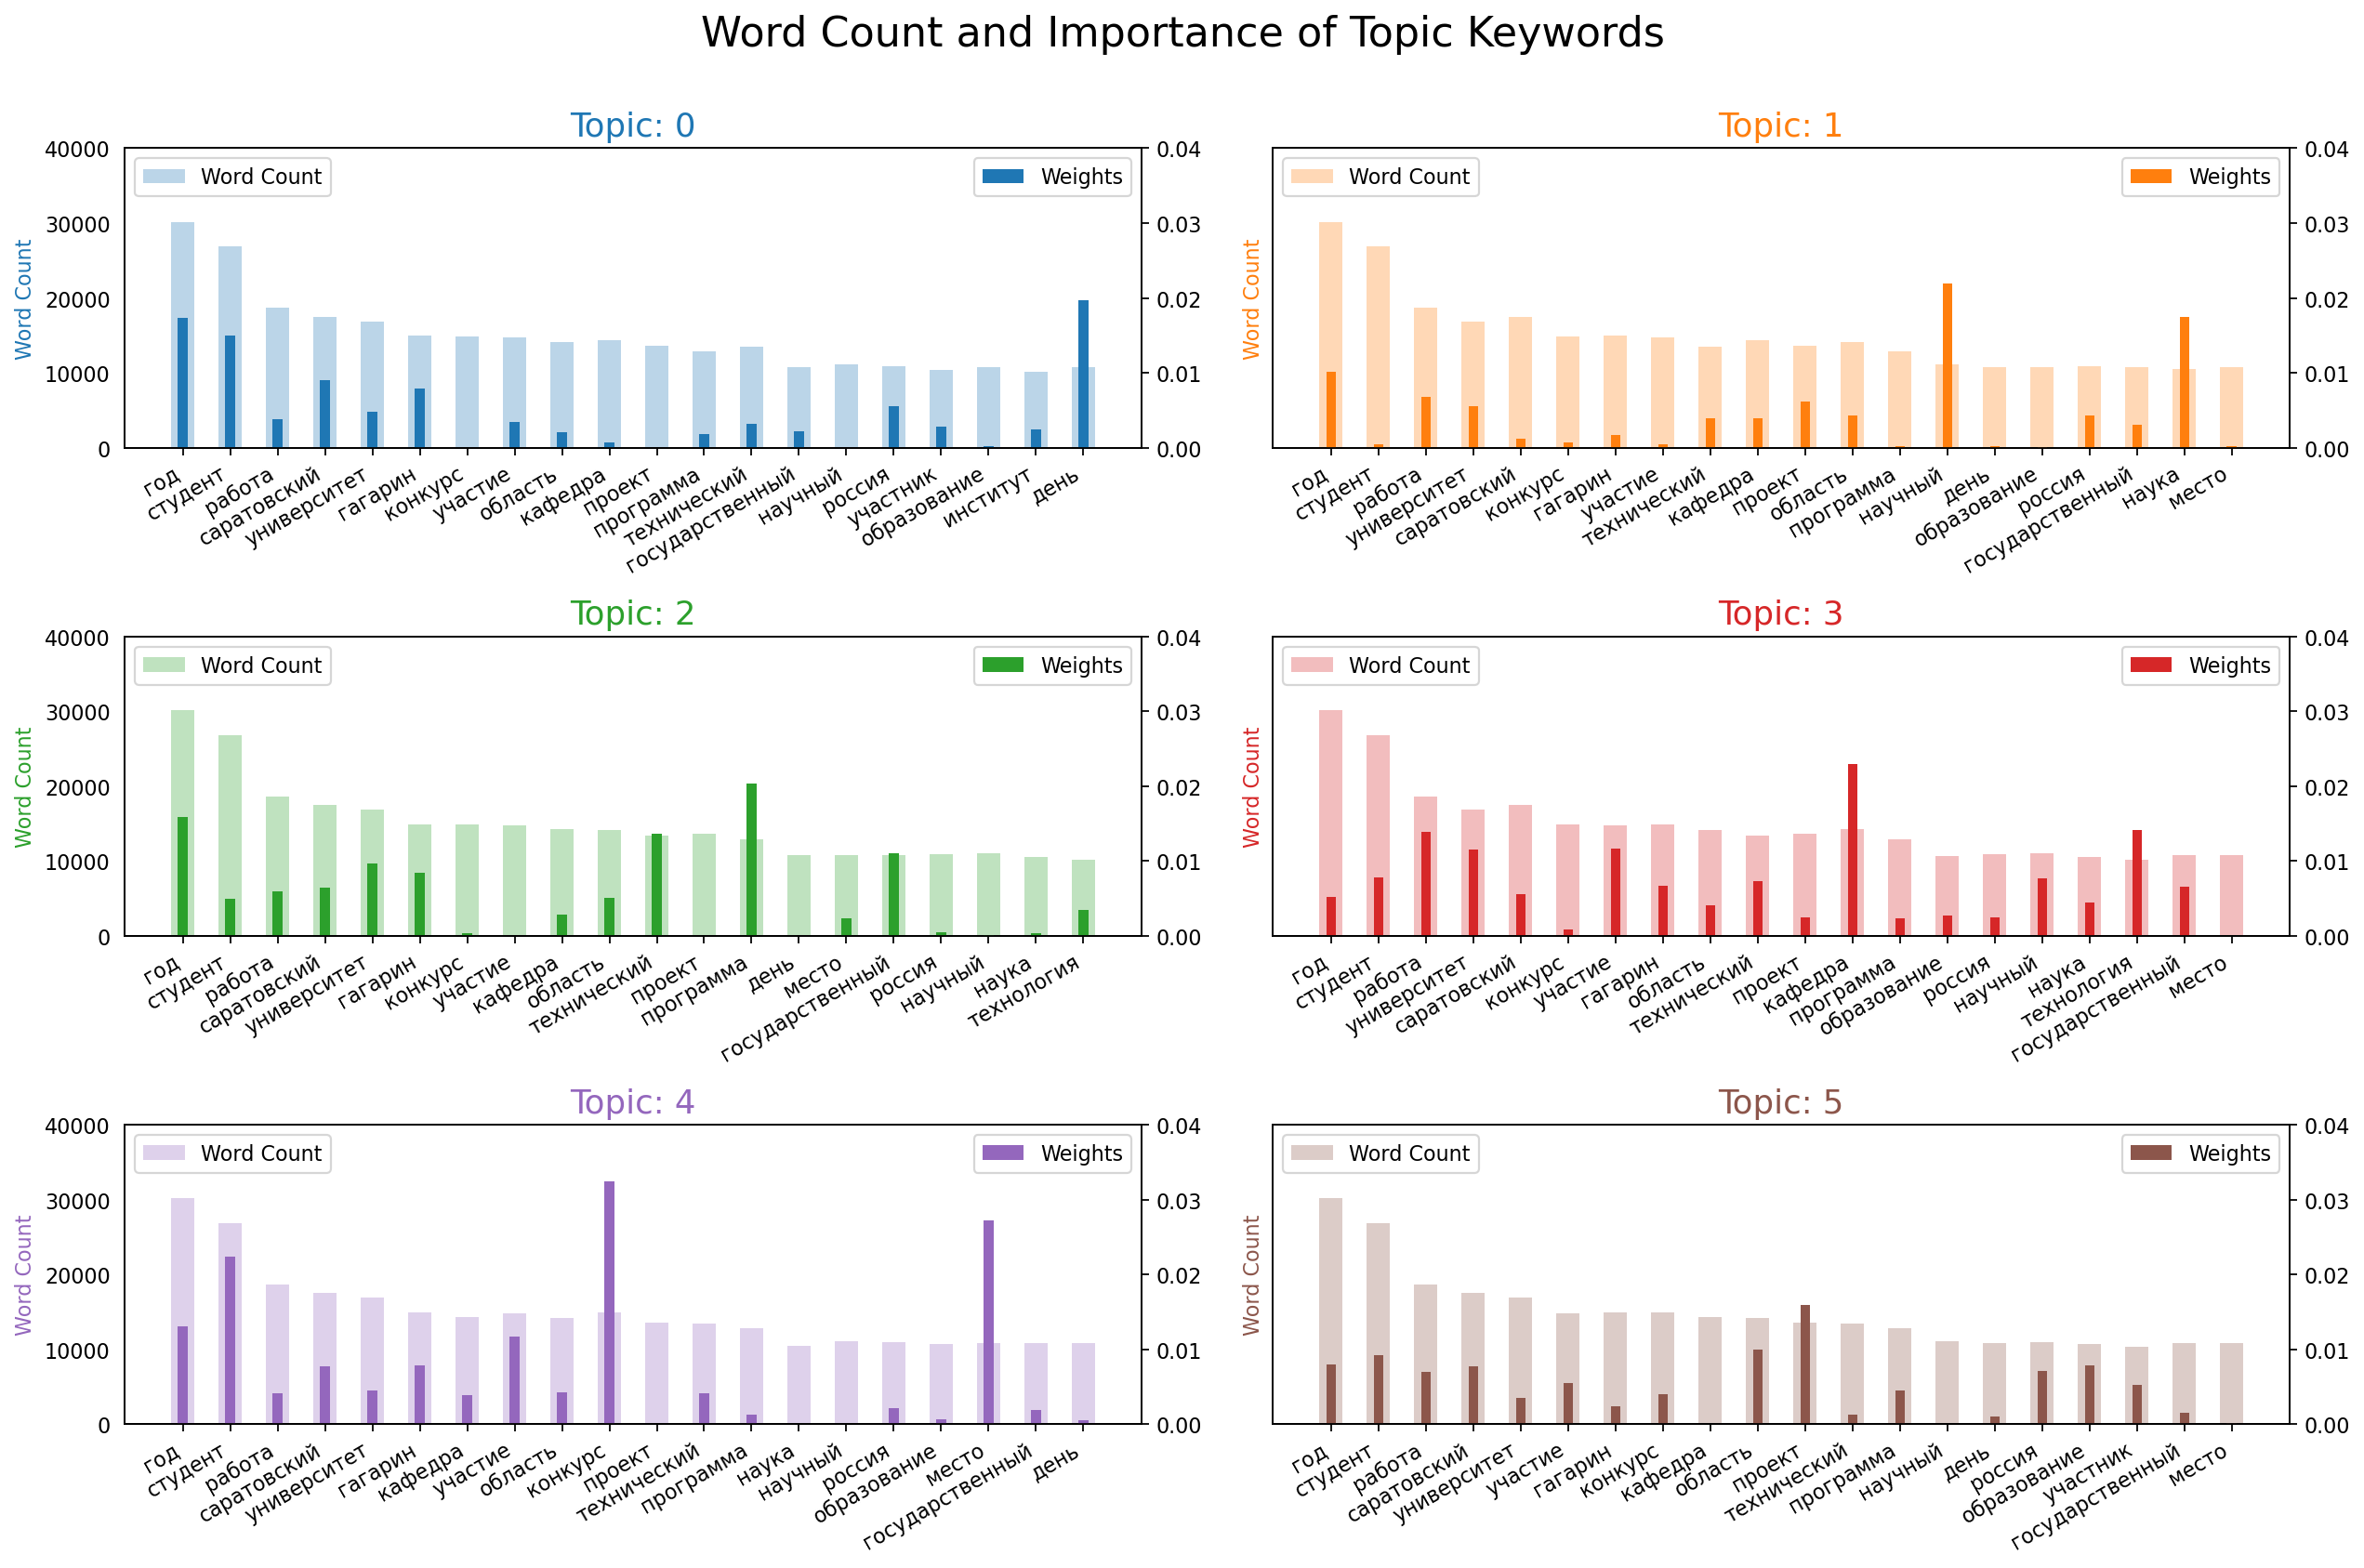

In [208]:
# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(3, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]

for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df1.loc[df1.topic_id==i, :], 
           color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df1.loc[df1.topic_id==i, :], 
                color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    
    ax_twin.set_ylim(0, 0.040); 
    ax.set_ylim(0, 40000)
    
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df1.loc[df1.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); 
    ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=20, y=1.05)    
plt.savefig('Word Count and Importance of Topic Keywords', dpi = 800)
plt.show()


Sentence Chart Colored by Topic

In [209]:
df_excel.head()

Unnamed: 0  News_Id                                         News_Title  \
0           0        1  В СЭИ обсудили экономико-правовое развитие сов...   
1           1        2  Прошла встреча представителей опорного вуза с ...   
2           2        3  Технический университет стал участником семина...   
3           3        4  Объявляется набор на подготовку по программе «...   
4           4        5  В ИнПИТ разработали лучший проект Школы цифров...   

   NumWords  NumUnicTokens                                          NewsWords  
0       136            106  сэи обсудить экономико правовой развитие совре...  
1       113             83  пройти встреча представитель опорный вуз выпус...  
2       228            158  технический университет участник семинар роско...  
3        78             52  объявляться набор подготовка программа строите...  
4       173            129  инпит разработать хороший проект школа цифрово...

In [210]:
i = 0
tp = db_theta.loc[i,['Most valueble topic']]['Most valueble topic']
#print(tp)
#tl = ' '.join(list(dict(Counter(df_excel.loc[i, ['NewsWords']]['NewsWords'].split(' ')).most_common(12)).keys()))
#print(tl)
ts = list(dict(Counter(df_excel.loc[i, ['NewsWords']]['NewsWords'].split(' ')).most_common(12)).keys())
#print(ts)
tw = list(set(ts) & set(db_words.index))
#print(tw)
tbd = r.loc[tw, ['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].idxmax(axis = 1)
word_dominanttopic = [ (w, tbd.loc[w][5])  for w in tbd.index]
print (word_dominanttopic)


[('регулирование', '3'), ('мероприятие', '0'), ('государственный', '2'), ('выступить', '3'), ('современный', '3'), ('развитие', '5'), ('правовой', '5'), ('экономико', '5'), ('институт', '3'), ('обсудить', '5'), ('россия', '5'), ('цифровой', '3')]


In [211]:
[name for name, color in mcolors.TABLEAU_COLORS.items()]

['tab:blue',
 'tab:orange',
 'tab:green',
 'tab:red',
 'tab:purple',
 'tab:brown',
 'tab:pink',
 'tab:gray',
 'tab:olive',
 'tab:cyan']

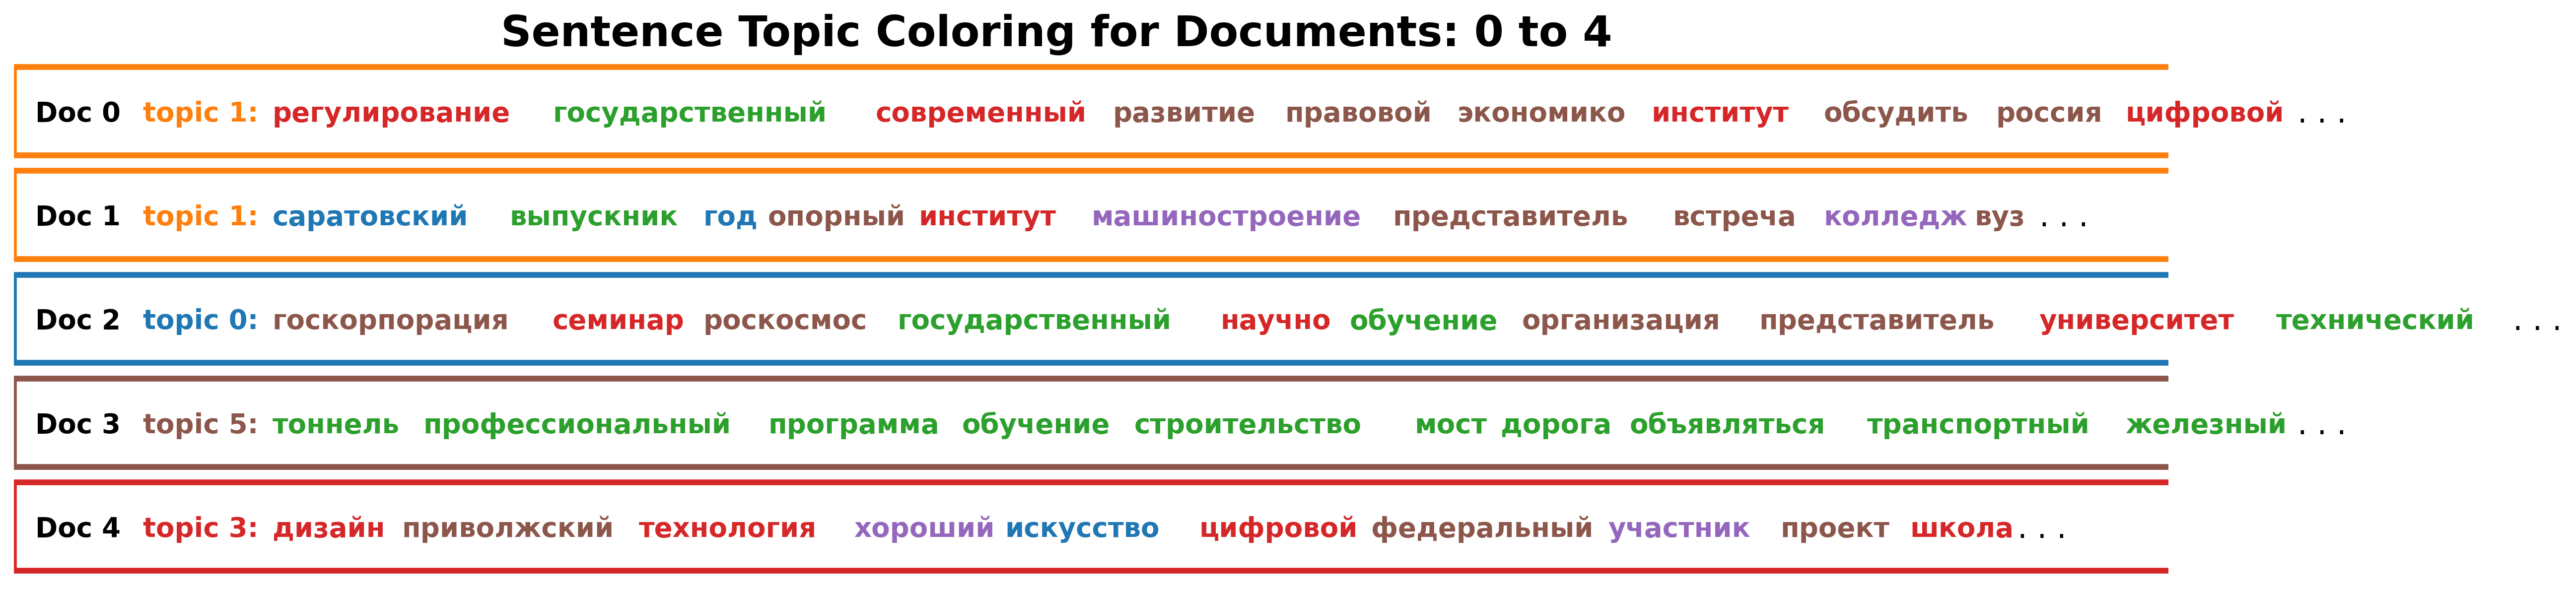

In [212]:
from matplotlib.patches import Rectangle

def sentences_chart(start = 0, end = 5):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.99), dpi=280)       
#    axes[0].axis('off')
    for i, ax in enumerate(axes):
#        print('i= ', i)
#        if i > 0:
            corp_cur = corp[i] 
            topic_percs = db_theta.loc[i,['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]
#            wordid_phivalues = db_words.loc[corp_cur.split(' '), ['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]
#            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            tp = db_theta.loc[i,['Most valueble topic']]['Most valueble topic']
            topic_percs_sorted = int(tp[5])
    
            ts = list(dict(Counter(df_excel.loc[i, ['NewsWords']]['NewsWords'].split(' ')).most_common(10)).keys())
            tw = list(set(ts) & set(db_words.index))
            tbd = r.loc[tw, ['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].idxmax(axis = 1)
            word_dominanttopic = [ (w, int(tbd.loc[w][5]))  for w in tbd.index ]
            
#            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i) + " ", verticalalignment='center',
                    fontsize=14, color='black', transform=ax.transAxes, fontweight=700)
            ax.text(0.06, 0.5,'topic '+tp[5]+': ', verticalalignment='center',
                    fontsize=14, color=mycolors[topic_percs_sorted], transform=ax.transAxes, fontweight=700)
            # Draw Rectange
#            tl = len(''.join(list(dict(Counter(df_excel.loc[i, ['NewsWords']]['NewsWords'].split(' ')).most_common(12)).keys())))
#            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            topic_percs_sorted = int(tp[5])
            pathpatch = Rectangle((0.0, 0.1), 1.1, 0.85, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted], linewidth=3)
            ax.add_patch(pathpatch)
#                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.12
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 12:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=14, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .01 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-1), fontsize=22, y=0.95, fontweight=700)
#    plt.tight_layout()
    plt.show()

corpus = list(df_excel['NewsWords'])    
sentences_chart(0, 5)    

# t-SNE Clustering Chart

In [213]:
# Определение границы для отбора доминантной темы для слов
g = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].max(axis=1)
weight_bound = round(g[g != 0].min(), 2)
print(weight_bound)

0.22


In [214]:
topics_name_list = ['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']
arr = db_theta[topics_name_list]
arr = arr[np.amax(arr, axis=1) >= 0.35]
arr1 = arr.values
np.argmax(arr1, axis=1)
#topic_num

array([1, 1, 0, ..., 3, 2, 0], dtype=int64)

In [215]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
#topic_weights = []
#for i, row_list in enumerate(lda_model[corpus]):
#    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
#arr = pd.DataFrame(topic_weights).fillna(0).values
topics_name_list = ['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']
arr = db_theta[topics_name_list]

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) >= 0.30].values

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 6
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 22145 samples in 0.017s...
[t-SNE] Computed neighbors for 22145 samples in 0.801s...
[t-SNE] Computed conditional probabilities for sample 1000 / 22145
[t-SNE] Computed conditional probabilities for sample 2000 / 22145
[t-SNE] Computed conditional probabilities for sample 3000 / 22145
[t-SNE] Computed conditional probabilities for sample 4000 / 22145
[t-SNE] Computed conditional probabilities for sample 5000 / 22145
[t-SNE] Computed conditional probabilities for sample 6000 / 22145
[t-SNE] Computed conditional probabilities for sample 7000 / 22145
[t-SNE] Computed conditional probabilities for sample 8000 / 22145
[t-SNE] Computed conditional probabilities for sample 9000 / 22145
[t-SNE] Computed conditional probabilities for sample 10000 / 22145
[t-SNE] Computed conditional probabilities for sample 11000 / 22145
[t-SNE] Computed conditional probabilities for sample 12000 / 22145
[t-SNE] Computed conditional probabilities for sam

Loading BokehJS ...

The most representative sentence for each topic

In [216]:
db_theta[['topic_0', 'topic_1', 'topic_2', 'topic_3', 'topic_4', 'topic_5']]

topic0    topic1    topic2    topic3    topic4    topic5  t0  t1  t2  t3  \
0  0.103558  0.781144  0.025861  0.067529  0.013202  0.008707   0   2   0   0   
1  0.061217  0.854072  0.076188  0.001499  0.000127  0.006897   0   2   0   0   
2  0.609389  0.025642  0.000348  0.319735  0.000133  0.044754   1   0   0   4   
3  0.001308  0.000011  0.155998  0.017627  0.091788  0.733269   0   0   0   0   
4  0.036122  0.000109  0.000088  0.570322  0.119202  0.274158   0   0   0   4   

   t4  t5 Most valueble topic  
0   0   0              topic1  
1   0   0              topic1  
2   0   0              topic0  
3   0   6              topic5  
4   0   6              topic3

In [243]:
prom = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']]
most_representative_news = dict(prom.astype(float).idxmax())

In [252]:
list(sent_topics_outdf_grpd.values())

[21445, 4735, 823, 1543, 609, 14546]

In [253]:
list(most_representative_news.values())

[21445, 4735, 823, 1543, 609, 14546]

In [248]:
#best_news = db_theta[['topic0', 'topic1', 'topic2', 'topic3', 'topic4', 'topic5']].astype(float).idxmax(axis=0, skipna=True)

sent_topics_outdf_grpd = most_representative_news
for i in sent_topics_outdf_grpd:
    grp = sent_topics_outdf_grpd[i]
    print(i ,df_excel.loc[grp, ['News_Title']]['News_Title'])

topic0 МБЦ СГТУ приглашает к сотрудничеству молодых ученых
topic1 «Офис проектного менеджмента»: в ИСПМ прошли сессии по защите проектов
topic2 Команда студентов-экологов и школьников участвуют в программе Биос-школы 2021 в Санкт-Петербурге
topic3 Стартовала студенческая акция #МамаЯЭкологист
topic4 Идет набор на обучение по программе «Трехмерное моделирование в программе Autodesk 3Ds Max»
topic5 Подведены итоги Всероссийского конкурса научных работ


In [219]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics = list()
for i in sent_topics_outdf_grpd:
    grp = sent_topics_outdf_grpd[i]
    long_string = ' '.join(list(main_topics[int(i[5])])[0:10])
    sent_topics.append([i, grp, long_string, df_excel.loc[grp, ['News_Title']]['News_Title']])
                                      
# Format
sent_topics_sorteddf_mallet = pd.DataFrame(sent_topics, columns = ['Topic_Num', 'Best_News_Num', 'Key words for topic', "Representative Text"])

# Reset Index    
sent_topics_sorteddf_mallet.index = sent_topics_sorteddf_mallet['Topic_Num']
sent_topics_sorteddf_mallet.pop('Topic_Num')
# Show
sent_topics_sorteddf_mallet.head(10)

Best_News_Num  \
Topic_Num                  
topic0             21445   
topic1              4735   
topic2               823   
topic3              1543   
topic4               609   
topic5             14546   

                                                                                           Key words for topic  \
Topic_Num                                                                                                        
topic0                          день год студент саратовский гагарин мероприятие музей праздник россия военный   
topic1                          научный наука учёный исследование год российский работа проект научно материал   
topic2     обучение программа год профессиональный технический государственный образование подготовка униве...   
topic3     кафедра конференция технология работа международный участие университет школа информационный сту...   
topic4                конкурс место студент команда победитель год участие соревнование олимпиада студенческий   
topic5                        проект развитие область студент бизнес год образование саратовский россия работа   

                                                                                        Representative Text  
Topic_Num                                                                                                    
topic0                                                  МБЦ СГТУ приглашает к сотрудничеству молодых ученых  
topic1                               «Офис проектного менеджмента»: в ИСПМ прошли сессии по защите проектов  
topic2     Команда студентов-экологов и школьников участвуют в программе Биос-школы 2021 в Санкт-Петербурге  
topic3                                                        Стартовала студенческая акция #МамаЯЭкологист  
topic4          Идет набор на обучение по программе «Трехмерное моделирование в программе Autodesk 3Ds Max»  
topic5                                                Подведены итоги Всероссийского конкурса научных работ